In [33]:
from collections import defaultdict
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from msaris.reader.reader import load_data
from msaris.reader.preprocessing import filter_intensities, reduce_data_resolution
from msaris.molecule.molecule import Molecule
from msaris.clusterisation.clusterisation import ClusterSearch, MaxClustering
from msaris.search.optimization_search import SearchClusters
from msaris.utils.intensities_util import norm
from msaris.utils.recognizing_utils import formal_formula

In [2]:
file_name = "PdCl2_neg_maxis_2"
DATA_SOURCE = f"./data/{file_name}.mzML"

In [3]:
#original data and processed
mz, it = load_data(
    DATA_SOURCE, range_spectrum=(100, 1500), min_intensity=100, mz_binning_width=5.0,
)
mz_processed, it_processed = reduce_data_resolution(mz, it, mz.shape[0], it.shape[0])

In [4]:
# Finding clusters
# ClusterSearch is far more computationally intensive
# while 

# clust = ClusterSearch(
#             resolution = 10 ** 5,
#             charge = 1,
#             min_peaks = 1,
#             cluster_width = 8,
#             tolerance = 0.2,
#             threshold = max(it)/500,
#             cluster_min_dist = 5,  # TODO: add support for CI
#         )
# masses_ = clust.find(mz_processed, it_processed)
clust = MaxClustering(
    window=5,
    threshold = max(it)/500
)
masses_ = clust.find(mz_processed, it_processed)

In [5]:
clust = MaxClustering(
    window=5,
    threshold = max(it)/500
)
masses_ = clust.find(mz_processed, it_processed)

In [6]:
#original idea to perform calculations based on the 
#provides ability to calculate some ions which 
#can be missed otherwise
initial_params = dict(
    no_TBAB=True,
    no_K=True,
    no_MeOH=True,
    no_Cu=False,
    no_Pd1=False,
    no_Pd=False,
    no_NaTFA=True,
    no_OH=True,
    no_H2O=True,
    no_O2=True,
    no_O=True,
    no_N2=True,
    no_Na=True,
    no_CH3CN=True,
)
iteration_steps = dict(
    no_Cu=True,
    no_Pd=True,
    no_Na=False,
    no_CH3CN=False,
    no_NaTFA=False,
    no_H2O=False,
    no_MeOH=False,
    no_TBAB=False,
    no_O2=False,
    no_O=False,
    no_N2=False,
)

In [7]:
# Calculation can take far too long, hence it can be 
# sped up by loading already calculated molecules
ions_path = "./ions/"
calculated_ions = {}
for entry in tqdm(glob.glob(f"{ions_path}*.json")):
    mol = Molecule()
    mol.load(entry)
    calculated_ions[mol.formula] = mol

  0%|          | 0/2324 [00:00<?, ?it/s]

Here is custom script to achieve and process calculated molecules
In future it would be calculated in script

In [8]:
ranked = defaultdict(list)
srch = SearchClusters(
    mz=mz,
    it=it,
    charge = -1,
    threshold = 0.7
)
path = f"./data/{file_name}"
for target_mass in tqdm(sorted(masses_)):
    found = []
    for to_change, value in iteration_steps.items():
        params = initial_params.copy()
        params[to_change] = value
        found.extend(srch.recognise_masses(
                    target_mass,
                    params,
                    epsilon_range =(0, 5, 0.25,), # due high mistakes I decided to take such big range
                    calculated_ions=calculated_ions,
                    ions_path = ions_path
                ))
    ranked[target_mass] = sorted(found, key=lambda x: x["delta"])  
    

  0%|          | 0/79 [00:00<?, ?it/s]

status: 1, Optimal
Delta m/z: -0.15800000000001546
Average mass = 134.446
Brutto formula: Cl2Cu1
134.604: Cu1Cl2 0.03402938572334535
status: 1, Optimal
Delta m/z: -3.6182000000000194
Average mass = 130.9858
Brutto formula: Cl1Cu1O2
status: 1, Optimal
Delta m/z: 4.011499999999984
Average mass = 175.4725
Brutto formula: C2Cl2Cu1H3N1
status: 1, Optimal
Delta m/z: -0.9938000000000144
Average mass = 170.4672
Brutto formula: Cl2Cu1H4O2
status: 1, Optimal
Delta m/z: -4.988800000000012
Average mass = 166.47220000000002
Brutto formula: C1Cl2Cu1H4O1
status: 1, Optimal
Delta m/z: 2.3987999999999907
Average mass = 173.8598
Brutto formula: Cl1O2Pd1
status: 1, Optimal
Delta m/z: 1.3390300000000028
Average mass = 178.54103
Brutto formula: Cl1Cu2O1
status: 1, Optimal
Delta m/z: 3.6632000000000104
Average mass = 190.4582
Brutto formula: Cl2Cu1N4
status: 1, Optimal
Delta m/z: -0.04059999999998354
Average mass = 198.4984
Brutto formula: C2Cl2Cu1H8O2
status: 1, Optimal
Delta m/z: -4.007199999999987
Averag

status: 1, Optimal
Delta m/z: -4.204400000000032
Average mass = 385.8986
Brutto formula: Cl5Cu3H2O1
status: 1, Optimal
Delta m/z: -1.652799999999992
Average mass = 388.4502
Brutto formula: Cl4Cu3N4
status: 1, Optimal
Delta m/z: 0.3299999999999841
Average mass = 397.548
Brutto formula: C8Cl3Cu2H12N4
status: 1, Optimal
Delta m/z: -1.551499999999976
Average mass = 395.66650000000004
Brutto formula: C2Cl4H3N1Pd2
status: 1, Optimal
Delta m/z: -3.399000000000001
Average mass = 393.819
Brutto formula: C4Cl4Cu1H6N2Pd1
status: 1, Optimal
Delta m/z: -0.22120000000001028
Average mass = 396.9968
Brutto formula: C4Cl4Cu2H16O4
status: 1, Optimal
Delta m/z: -0.7275999999999954
Average mass = 396.4904
Brutto formula: C2Cl4Cu3H8O2
status: 1, Optimal
Delta m/z: -3.644999999999982
Average mass = 393.57300000000004
Brutto formula: C5Cl3Cu2H20O5
status: 1, Optimal
Delta m/z: 1.876000000000019
Average mass = 399.09400000000005
Brutto formula: Br1Cl3Pd2
status: 1, Optimal
Delta m/z: -4.694200000000013
Averag

status: 1, Optimal
Delta m/z: 0.3321000000000218
Average mass = 559.9661
Brutto formula: Cl6N2Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl6N2Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.1978999999999793
Average mass = 558.4361
Brutto formula: Cl6Cu5N2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl6Cu5N2.json ✨
status: 1, Optimal
Delta m/z: -1.2878000000000114
Average mass = 558.3462
Brutto formula: Cl7Cu4N4
status: 1, Optimal
Delta m/z: 0.8240000000000123
Average mass = 567.4100000000001
Brutto formula: Cl7Pd3
566.586: Pd3Cl7 0.06743813786318797
status: 1, Optimal
Delta m/z: -0.7060000000000173
Average mass = 565.8800000000001
Brutto formula: Cl7Cu5
status: 1, Optimal
Delta m/z: -3.4944600000000037
Average mass = 563.09154
Brutto formula: Cl8Cu2Na2Pd1
566.586: Cu2Na2Pd1Cl8 0.4536978413917251
status: 1, Optimal
Delta m/z: 0.03560000000001651
Average mass = 566.6216
Brutto formula: C2Cl5Cu1F3O2Pd2
status: 1, Opt

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl7Cu5H4O2.json ✨
status: 1, Optimal
Delta m/z: -3.1909999999999457
Average mass = 599.811
Brutto formula: Cl6Cu3H10O5Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl6Cu3H10O5Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.762199999999922
Average mass = 599.2398
Brutto formula: Cl7Cu3H6O3Pd1
status: 1, Optimal
Delta m/z: -0.08279999999993493
Average mass = 602.9191999999999
Brutto formula: C6Cl5Cu2H24O6Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl5Cu2H24O6Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.565799999999925
Average mass = 599.4362000000001
Brutto formula: C1Cl7H4O1Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC1Cl7H4O1Pd3.json ✨
status: 1, Optimal
Delta m/z: -4.589399999999941
Average mass = 598.4126
Brutto formula: C3Cl7Cu4H12O3
status: 1, Optimal
Delta m/z: -1.7817999999999259
Average 

status: 1, Optimal
Delta m/z: -0.19439999999992708
Average mass = 648.9666000000001
Brutto formula: Cl7Cu1H2O1Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl7Cu1H2O1Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.7243999999998998
Average mass = 647.4366
Brutto formula: Cl7Cu6H2O1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl7Cu6H2O1.json ✨
status: 1, Optimal
Delta m/z: -2.170999999999907
Average mass = 646.99
Brutto formula: Cl6Cu4H20O10
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl6Cu4H20O10.json ✨
status: 1, Optimal
Delta m/z: -2.74219999999994
Average mass = 646.4188
Brutto formula: Cl7Cu4H16O8
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl7Cu4H16O8.json ✨
status: 1, Optimal
Delta m/z: -4.385799999999982
Average mass = 644.7752
Brutto formula: Cl7Cu4H4O2Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl7C

status: 1, Optimal
Delta m/z: -3.9184000000000303
Average mass = 662.2146
Brutto formula: Cl8Cu4H2O1Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl8Cu4H2O1Pd1.json ✨
status: 1, Optimal
Delta m/z: -0.7505999999999915
Average mass = 665.3824000000001
Brutto formula: C2Cl8Cu5H8O2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl8Cu5H8O2.json ✨
status: 1, Optimal
Delta m/z: -2.6444000000000045
Average mass = 663.4886
Brutto formula: C3Cl7H12O3Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC3Cl7H12O3Pd3.json ✨
status: 1, Optimal
Delta m/z: -3.150800000000018
Average mass = 662.9822
Brutto formula: C1Cl7Cu1H4O1Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC1Cl7Cu1H4O1Pd3.json ✨
status: 1, Optimal
Delta m/z: -3.6680000000000064
Average mass = 662.465
Brutto formula: C5Cl7Cu4H20O5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\project

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr1C16Cl4H36N1Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.3340000000000316
Average mass = 675.4100000000001
Brutto formula: Br1Cl6Cu1Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr1Cl6Cu1Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.5502000000000784
Average mass = 676.1937999999999
Brutto formula: Cl8Cu4O2Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl8Cu4O2Pd1.json ✨
status: 1, Optimal
Delta m/z: 1.9099999999999113
Average mass = 679.654
Brutto formula: Cl9Cu4Pd1
status: 1, Optimal
Delta m/z: -2.6929700000000363
Average mass = 675.0510300000001
Brutto formula: Cl6Cu2O1Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl6Cu2O1Pd3.json ✨
status: 1, Optimal
Delta m/z: 1.800200000000011
Average mass = 679.5442
Brutto formula: Cl8Cu2N4Pd2
status: 1, Optimal
Delta m/z: -0.09845999999998867
Average mass =

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl4Cu2F9Na1O6Pd1.json ✨
status: 1, Optimal
Delta m/z: -0.9568299999999681
Average mass = 736.47017
Brutto formula: C8Cl2Cu3F12Na1O8
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl2Cu3F12Na1O8.json ✨
status: 1, Optimal
Delta m/z: -2.4861999999999966
Average mass = 734.9408000000001
Brutto formula: C6Cl4Cu4F9O6
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl4Cu4F9O6.json ✨
status: 1, Optimal
Delta m/z: 0.06260000000003174
Average mass = 737.4896000000001
Brutto formula: Cl7Cu6H12O6
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl7Cu6H12O6.json ✨
status: 1, Optimal
Delta m/z: -0.5085999999999871
Average mass = 736.9184000000001
Brutto formula: Cl8Cu6H8O4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl8Cu6H8O4.json ✨
status: 1, Optimal
Delta m/z: -1.0798000000000556
Av

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC12Cl7Cu4H18N6.json ✨
status: 1, Optimal
Delta m/z: -3.0319999999999823
Average mass = 748.4590000000001
Brutto formula: C4Cl8Cu1H6N2Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl8Cu1H6N2Pd3.json ✨
status: 1, Optimal
Delta m/z: -4.561999999999955
Average mass = 746.9290000000001
Brutto formula: C4Cl8Cu6H6N2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl8Cu6H6N2.json ✨
status: 1, Optimal
Delta m/z: -4.87949999999995
Average mass = 746.6115000000001
Brutto formula: C6Cl8Cu2H9N3Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl8Cu2H9N3Pd2.json ✨
status: 1, Optimal
Delta m/z: -0.1253999999998996
Average mass = 751.3656000000001
Brutto formula: C2Cl6F3O2Pd4
status: 1, Optimal
Delta m/z: -4.443860000000058
Average mass = 747.04714
Brutto formula: C2Cl7Cu2F3Na2O2Pd2
✨ JSON with was created: C:\User

status: 1, Optimal
Delta m/z: -0.46602999999996086
Average mass = 779.39097
Brutto formula: C4Cl6Cu5F6Na1O4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl6Cu5F6Na1O4.json ✨
status: 1, Optimal
Delta m/z: -0.5128300000000081
Average mass = 779.34417
Brutto formula: C8Cl2Cu2F12Na1O8Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl2Cu2F12Na1O8Pd1.json ✨
status: 1, Optimal
Delta m/z: -1.2537999999999272
Average mass = 778.6032
Brutto formula: C4Cl6Cu2F6O4Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl6Cu2F6O4Pd2.json ✨
status: 1, Optimal
Delta m/z: -1.6783199999999
Average mass = 778.1786800000001
Brutto formula: C2Cl9Cu4F3Na4O2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl9Cu4F3Na4O2.json ✨
status: 1, Optimal
Delta m/z: -1.9953999999999894
Average mass = 777.8616
Brutto formula: C2Cl8Cu6F3O2
✨ JSON with was created: C:\Users\Anton_bond

status: 1, Optimal
Delta m/z: -3.440399999999965
Average mass = 781.8826
Brutto formula: Cl9Cu7H2O1
status: 1, Optimal
Delta m/z: -3.8869999999999436
Average mass = 781.436
Brutto formula: Cl8Cu5H20O10
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl8Cu5H20O10.json ✨
status: 1, Optimal
Delta m/z: -4.000600000000006
Average mass = 781.3224
Brutto formula: Cl8H8O4Pd4
status: 1, Optimal
Delta m/z: -4.571799999999961
Average mass = 780.7512
Brutto formula: Cl9H4O2Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl9H4O2Pd4.json ✨
785.323: Pd4Cl9(H2O)2 0.3112797819504616
status: 1, Optimal
Delta m/z: -1.6599999999999113
Average mass = 783.6630000000001
Brutto formula: C5Cl8Cu2H20O5Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC5Cl8Cu2H20O5Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.166399999999882
Average mass = 783.1566
Brutto formula: C3Cl8Cu3H12O3Pd2
✨ JSON with was created: C:\Users

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl10Cu2H3N1Pd3.json ✨
status: 1, Optimal
Delta m/z: -0.6280000000000427
Average mass = 841.699
Brutto formula: C20Cl5Cu4H30N10
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC20Cl5Cu4H30N10.json ✨
status: 1, Optimal
Delta m/z: -1.9784999999999968
Average mass = 840.3485
Brutto formula: C2Cl10Cu7H3N1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl10Cu7H3N1.json ✨
status: 1, Optimal
Delta m/z: -2.5095000000000596
Average mass = 839.8174999999999
Brutto formula: C14Cl6Cu2H21N7Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC14Cl6Cu2H21N7Pd2.json ✨
status: 1, Optimal
Delta m/z: -4.390999999999906
Average mass = 837.936
Brutto formula: C8Cl7H12N4Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl7H12N4Pd4.json ✨
status: 1, Optimal
Delta m/z: -0.22460000000000946
Average

status: 1, Optimal
Delta m/z: -2.123999999999967
Average mass = 845.9250000000001
Brutto formula: C4Cl9Cu7H6N2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl9Cu7H6N2.json ✨
status: 1, Optimal
Delta m/z: -2.4414999999999623
Average mass = 845.6075000000001
Brutto formula: C6Cl9Cu3H9N3Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl9Cu3H9N3Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.0058600000000126
Average mass = 846.04314
Brutto formula: C2Cl8Cu3F3Na2O2Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl8Cu3F3Na2O2Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.793629999999979
Average mass = 845.25537
Brutto formula: C2Cl8F3Na1O2Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl8F3Na1O2Pd4.json ✨
status: 1, Optimal
Delta m/z: -3.5820299999999463
Average mass = 844.46697
Brutto formula: C4Cl6Cu1F6Na1O4Pd3
✨ JSON with was created: C:\Users\An

status: 1, Optimal
Delta m/z: -0.15299999999996317
Average mass = 853.9250000000001
Brutto formula: Cl9Cu7H10O5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl9Cu7H10O5.json ✨
status: 1, Optimal
Delta m/z: -0.7241999999999678
Average mass = 853.3538
Brutto formula: Cl10Cu7H6O3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl10Cu7H6O3.json ✨
status: 1, Optimal
Delta m/z: -1.2953999999999262
Average mass = 852.7826
Brutto formula: Cl11Cu7H2O1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl11Cu7H2O1.json ✨
status: 1, Optimal
Delta m/z: -2.243199999999973
Average mass = 851.8348
Brutto formula: Cl8Cu5H16O8Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl8Cu5H16O8Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.3855999999999966
Average mass = 850.6924
Brutto formula: Cl10Cu5H8O4Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\

status: 1, Optimal
Delta m/z: -4.497800000000012
Average mass = 858.5632
Brutto formula: C6Cl8Cu1H24O6Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl8Cu1H24O6Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.3269999999999698
Average mass = 861.734
Brutto formula: Br2Cl6Cu1Pd4
status: 1, Optimal
Delta m/z: -2.1232000000000006
Average mass = 860.9377999999999
Brutto formula: Cl9Cu3O2Pd3
status: 1, Optimal
Delta m/z: -3.65320000000003
Average mass = 859.4078000000001
Brutto formula: Cl9Cu8O2
status: 1, Optimal
Delta m/z: -4.86597000000001
Average mass = 858.19503
Brutto formula: Cl10Cu6O1Pd1
status: 1, Optimal
Delta m/z: -0.3028000000000546
Average mass = 862.7582
Brutto formula: Cl9Cu6N4Pd1
status: 1, Optimal
Delta m/z: -3.795000000000016
Average mass = 886.6
Brutto formula: Cl10Pd5
status: 1, Optimal
Delta m/z: -0.68945999999994
Average mass = 889.70554
Brutto formula: Cl10Cu1Na2Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\m

status: 1, Optimal
Delta m/z: -2.253150000000005
Average mass = 893.52885
Brutto formula: Cl13Cu5Na5
895.782: Cu5Na5Cl13 0.39042322171930843
status: 1, Optimal
Delta m/z: -2.570229999999981
Average mass = 893.2117700000001
Brutto formula: Cl12Cu7Na1
status: 1, Optimal
Delta m/z: 0.12350000000003547
Average mass = 895.9055000000001
Brutto formula: C6Cl8Cu1H9N3Pd4
status: 1, Optimal
Delta m/z: -1.7240000000000464
Average mass = 894.058
Brutto formula: C8Cl8Cu2H12N4Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl8Cu2H12N4Pd3.json ✨
status: 1, Optimal
Delta m/z: -3.254000000000019
Average mass = 892.528
Brutto formula: C8Cl8Cu7H12N4
status: 1, Optimal
Delta m/z: -3.6055000000000064
Average mass = 892.1765
Brutto formula: C2Cl9H3N1Pd5
status: 1, Optimal
Delta m/z: -0.34669000000008054
Average mass = 895.4353100000001
Brutto formula: C10Cl2Cu3F15Na3O10
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl2Cu3F15Na3O10.js

status: 1, Optimal
Delta m/z: -3.2797200000000544
Average mass = 898.5882799999999
Brutto formula: C4Cl8Cu3F6Na4O4Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl8Cu3F6Na4O4Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.643599999999992
Average mass = 898.2244000000001
Brutto formula: C8Cl3Cu2F12O8Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl3Cu2F12O8Pd2.json ✨
status: 1, Optimal
Delta m/z: -4.068120000000022
Average mass = 897.79988
Brutto formula: C6Cl6Cu4F9Na4O6
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl6Cu4F9Na4O6.json ✨
status: 1, Optimal
Delta m/z: -4.432000000000016
Average mass = 897.436
Brutto formula: C10Cl1Cu3F15O10Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl1Cu3F15O10Pd1.json ✨
status: 1, Optimal
Delta m/z: -4.855889999999931
Average mass = 897.0121100000002
Brutto formula: C6Cl6Cu1F9Na3O6Pd2
✨ JSON with was cr

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC7Cl8Cu3H28O7Pd2.json ✨
status: 1, Optimal
Delta m/z: -0.8120000000000687
Average mass = 910.755
Brutto formula: C5Cl8Cu4H20O5Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC5Cl8Cu4H20O5Pd2.json ✨
status: 1, Optimal
Delta m/z: -1.8948000000000462
Average mass = 909.6722
Brutto formula: C1Cl11Cu6H4O1Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC1Cl11Cu6H4O1Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.7293999999999983
Average mass = 907.8376
Brutto formula: C8Cl7Cu3H32O8Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl7Cu3H32O8Pd2.json ✨
status: 1, Optimal
Delta m/z: -3.7886000000000024
Average mass = 907.7784
Brutto formula: C2Cl10Cu1H8O2Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl10Cu1H8O2Pd4.json ✨
status: 1, Optimal
Delta m/z: -4.8122000000000185
Ave

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl9Cu5H8O2Pd2.json ✨
status: 1, Optimal
Delta m/z: 1.0130000000000337
Average mass = 916.2760000000001
Brutto formula: Br1Cl8Cu2Pd4
status: 1, Optimal
Delta m/z: -3.4128000000000327
Average mass = 911.8502000000001
Brutto formula: Br2C16Cl6Cu3H36N1Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr2C16Cl6Cu3H36N1Pd1.json ✨
status: 1, Optimal
Delta m/z: -4.992799999999988
Average mass = 910.2701999999999
Brutto formula: Br1C16Cl7Cu2H36N1Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr1C16Cl7Cu2H36N1Pd2.json ✨
status: 1, Optimal
Delta m/z: 1.7967999999999016
Average mass = 917.0597999999999
Brutto formula: Cl10Cu5O2Pd2
status: 1, Optimal
Delta m/z: 0.6540300000000858
Average mass = 915.9170300000001
Brutto formula: Cl8Cu3O1Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl8Cu3O1Pd4.json ✨
915.263: Cu

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC1Cl10Cu5H4O1Pd2.json ✨
922.038: Cu5Pd2Cl10(CH3OH)1 0.3425088512323856
status: 1, Optimal
Delta m/z: -0.09979999999995925
Average mass = 921.9382
Brutto formula: C16Cl9Cu4H36N1Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC16Cl9Cu4H36N1Pd1.json ✨
status: 1, Optimal
Delta m/z: -2.763800000000117
Average mass = 919.2741999999998
Brutto formula: Br2C16Cl5Cu2H36N1Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr2C16Cl5Cu2H36N1Pd2.json ✨
status: 1, Optimal
Delta m/z: -4.1819999999999595
Average mass = 917.856
Brutto formula: Br2Cl7Cu3Pd3
status: 1, Optimal
Delta m/z: -3.4481999999999893
Average mass = 918.5898
Brutto formula: Cl10O2Pd5
922.038: Pd5Cl10(O2_1)1 0.46811716193032615
status: 1, Optimal
Delta m/z: -0.2969700000000497
Average mass = 921.7410299999999
Brutto formula: Cl10Cu7O1Pd1
status: 1, Optimal
Delta m/z: -1.6277999999999864


status: 1, Optimal
Delta m/z: -1.0789999999999509
Average mass = 1019.5160000000002
Brutto formula: Cl12Cu6Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl12Cu6Pd2.json ✨
status: 1, Optimal
Delta m/z: -1.5496899999998845
Average mass = 1019.0453100000002
Brutto formula: Cl13Cu1Na3Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl13Cu1Na3Pd4.json ✨
status: 1, Optimal
Delta m/z: -3.079689999999971
Average mass = 1017.5153100000001
Brutto formula: Cl13Cu6Na3Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl13Cu6Na3Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.867460000000051
Average mass = 1016.7275400000001
Brutto formula: Cl13Cu3Na2Pd3
status: 1, Optimal
Delta m/z: 0.27149999999994634
Average mass = 1020.8665
Brutto formula: C18Cl7Cu3H27N9Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC18Cl7Cu3H27N9Pd2.json ✨
1020.595: Cu3Pd2Cl7(CH3CN)9 0.37210

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr3Cl7Pd5.json ✨
status: 1, Optimal
Delta m/z: -2.162999999999954
Average mass = 1018.4320000000001
Brutto formula: Br3Cl7Cu5Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr3Cl7Cu5Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.3248000000000673
Average mass = 1018.2701999999999
Brutto formula: Br2C16Cl6Cu3H36N1Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr2C16Cl6Cu3H36N1Pd2.json ✨
status: 1, Optimal
Delta m/z: -3.743000000000052
Average mass = 1016.852
Brutto formula: Br2Cl8Cu4Pd3
status: 1, Optimal
Delta m/z: 0.45100000000002183
Average mass = 1021.046
Brutto formula: Cl12Cu1Pd5
status: 1, Optimal
Delta m/z: -3.009199999999968
Average mass = 1017.5858000000001
Brutto formula: Cl11Cu1O2Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl11Cu1O2Pd5.json ✨
status: 1, Optimal
Delta m/z: -4.53919999999994

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl14Cu6Na2Pd1.json ✨
status: 1, Optimal
Delta m/z: -2.0252299999997376
Average mass = 1029.2577700000002
Brutto formula: Cl11Cu3Na1Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl11Cu3Na1Pd4.json ✨
status: 1, Optimal
Delta m/z: -3.3081499999998414
Average mass = 1027.97485
Brutto formula: Cl15Cu6Na5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl15Cu6Na5.json ✨
status: 1, Optimal
Delta m/z: -3.625229999999874
Average mass = 1027.65777
Brutto formula: Cl14Cu8Na1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl14Cu8Na1.json ✨
status: 1, Optimal
Delta m/z: -4.342999999999847
Average mass = 1026.94
Brutto formula: Cl11Cu5Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl11Cu5Pd3.json ✨
status: 1, Optimal
Delta m/z: -4.813689999999838
Average mass = 1026.46931
Brutto form

status: 1, Optimal
Delta m/z: -1.9791999999997678
Average mass = 1029.3038000000001
Brutto formula: Cl12Cu9O2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl12Cu9O2.json ✨
status: 1, Optimal
Delta m/z: -1.591969999999952
Average mass = 1029.69103
Brutto formula: Cl10Cu2O1Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl10Cu2O1Pd5.json ✨
status: 1, Optimal
Delta m/z: -3.121969999999868
Average mass = 1028.16103
Brutto formula: Cl10Cu7O1Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl10Cu7O1Pd2.json ✨
status: 1, Optimal
Delta m/z: 1.3712000000000941
Average mass = 1032.6542000000002
Brutto formula: Cl12Cu7N4Pd1
status: 1, Optimal
Delta m/z: -4.4527999999998045
Average mass = 1026.8302
Brutto formula: Cl10Cu3N4Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl10Cu3N4Pd4.json ✨
status: 1, Optimal
Delta m/z: -3.858000000000004
Average mass = 1063.

status: 1, Optimal
Delta m/z: -2.4814000000000505
Average mass = 1065.2966000000001
Brutto formula: C3Cl13Cu8H12O3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC3Cl13Cu8H12O3.json ✨
status: 1, Optimal
Delta m/z: -2.9877999999998934
Average mass = 1064.7902
Brutto formula: C1Cl13Cu9H4O1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC1Cl13Cu9H4O1.json ✨
status: 1, Optimal
Delta m/z: -3.2923999999999864
Average mass = 1064.4856
Brutto formula: C8Cl9Cu1H32O8Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl9Cu1H32O8Pd4.json ✨
status: 1, Optimal
Delta m/z: -4.315999999999974
Average mass = 1063.4620000000002
Brutto formula: C10Cl9Cu5H40O10Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl9Cu5H40O10Pd1.json ✨
status: 1, Optimal
Delta m/z: -4.881599999999963
Average mass = 1062.8964
Brutto formula: C2Cl12Cu4H8O2Pd3
✨ JSON with was created: C:\Users\

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl11Cu4F6Na4O4Pd1.json ✨
status: 1, Optimal
Delta m/z: 0.0668000000000859
Average mass = 1073.5478
Brutto formula: Cl12Cu6H6O3Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl12Cu6H6O3Pd2.json ✨
1073.481: Cu6Pd2Cl12(H2O)3 0.5071380433852911
status: 1, Optimal
Delta m/z: -0.37979999999993197
Average mass = 1073.1012
Brutto formula: Cl11Cu4H24O12Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl11Cu4H24O12Pd2.json ✨
status: 1, Optimal
Delta m/z: -0.5043999999999862
Average mass = 1072.9766
Brutto formula: Cl13Cu6H2O1Pd2
1073.481: Cu6Pd2Cl13(H2O)1 0.48756346919570814
status: 1, Optimal
Delta m/z: -1.4522000000000332
Average mass = 1072.0287999999998
Brutto formula: Cl10Cu4H16O8Pd3
status: 1, Optimal
Delta m/z: -2.023399999999924
Average mass = 1071.4576000000002
Brutto formula: Cl11Cu4H12O6Pd3
status: 1, Optimal
Delta m/z: -2.5945999999

status: 1, Optimal
Delta m/z: -0.24065999999999121
Average mass = 1079.43834
Brutto formula: C6Cl7Cu2F9Na2O6Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl7Cu2F9Na2O6Pd3.json ✨
status: 1, Optimal
Delta m/z: -0.9822600000001103
Average mass = 1078.69674
Brutto formula: C4Cl9Cu6F6Na2O4Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl9Cu6F6Na2O4Pd1.json ✨
status: 1, Optimal
Delta m/z: -1.0290600000000723
Average mass = 1078.64994
Brutto formula: C8Cl5Cu3F12Na2O8Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl5Cu3F12Na2O8Pd2.json ✨
status: 1, Optimal
Delta m/z: -1.8168300000000954
Average mass = 1077.8621699999999
Brutto formula: C8Cl5F12Na1O8Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl5F12Na1O8Pd4.json ✨
status: 1, Optimal
Delta m/z: -2.1945500000000777
Average mass = 1077.4844500000002
Brutto formula: C2Cl12Cu5F3Na5O2Pd1
✨ JSO

status: 1, Optimal
Delta m/z: -1.5589199999999437
Average mass = 1090.73308
Brutto formula: Cl15Cu4Na4Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl15Cu4Na4Pd2.json ✨
1092.292: Cu4Na4Pd2Cl15 0.6443365491493249
status: 1, Optimal
Delta m/z: -1.875999999999749
Average mass = 1090.4160000000002
Brutto formula: Cl14Cu6Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl14Cu6Pd2.json ✨
status: 1, Optimal
Delta m/z: -3.876689999999826
Average mass = 1088.41531
Brutto formula: Cl15Cu6Na3Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl15Cu6Na3Pd1.json ✨
status: 1, Optimal
Delta m/z: -4.594459999999799
Average mass = 1087.6975400000001
Brutto formula: Cl12Cu3Na2Pd4
status: 1, Optimal
Delta m/z: -0.2419999999999618
Average mass = 1092.05
Brutto formula: C8Cl10Cu4H12N4Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl10Cu4H12N4Pd3.json ✨
status: 1, 

status: 1, Optimal
Delta m/z: -0.7931999999997856
Average mass = 1091.4988
Brutto formula: C4Cl11Cu4H16O4Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl11Cu4H16O4Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.310399999999845
Average mass = 1090.9816
Brutto formula: C8Cl11Cu7H32O8
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl11Cu7H32O8.json ✨
status: 1, Optimal
Delta m/z: -2.323199999999872
Average mass = 1089.9688
Brutto formula: C4Cl11Cu9H16O4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl11Cu9H16O4.json ✨
status: 1, Optimal
Delta m/z: -2.8295999999998287
Average mass = 1089.4624000000001
Brutto formula: C2Cl11Cu10H8O2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl11Cu10H8O2.json ✨
status: 1, Optimal
Delta m/z: -3.204199999999787
Average mass = 1089.0878000000002
Brutto formula: C9Cl10Cu2H36O9Pd3
✨ JSON with was created: C:\Users\Anto

status: 1, Optimal
Delta m/z: -2.7426000000000386
Average mass = 1096.2164
Brutto formula: C8Cl5Cu4F12O8Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl5Cu4F12O8Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.789399999999887
Average mass = 1096.1696000000002
Brutto formula: C12Cl1Cu1F18O12Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC12Cl1Cu1F18O12Pd3.json ✨
status: 1, Optimal
Delta m/z: -3.1671199999999544
Average mass = 1095.7918800000002
Brutto formula: C6Cl8Cu6F9Na4O6
status: 1, Optimal
Delta m/z: -3.4841999999999302
Average mass = 1095.4748000000002
Brutto formula: C6Cl7Cu8F9O6
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl7Cu8F9O6.json ✨
status: 1, Optimal
Delta m/z: -3.5310000000000628
Average mass = 1095.428
Brutto formula: C10Cl3Cu5F15O10Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl3Cu5F15O10Pd1.json ✨
status: 1, Optimal
D

status: 1, Optimal
Delta m/z: -0.560000000000116
Average mass = 1105.2640000000001
Brutto formula: Cl12Cu4Pd4
status: 1, Optimal
Delta m/z: -2.0900000000000887
Average mass = 1103.7340000000002
Brutto formula: Cl12Cu9Pd1
status: 1, Optimal
Delta m/z: -2.560690000000079
Average mass = 1103.26331
Brutto formula: Cl13Cu4Na3Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl13Cu4Na3Pd3.json ✨
1105.824: Cu4Na3Pd3Cl13 0.3915886631884635
status: 1, Optimal
Delta m/z: -3.348460000000159
Average mass = 1102.4755400000001
Brutto formula: Cl13Cu1Na2Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl13Cu1Na2Pd5.json ✨
1105.824: Cu1Na2Pd5Cl13 0.14296206670693845
status: 1, Optimal
Delta m/z: -4.090690000000052
Average mass = 1101.73331
Brutto formula: Cl13Cu9Na3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl13Cu9Na3.json ✨
status: 1, Optimal
Delta m/z: -4.561380000000099
Average mass = 1101.262

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl12Cu7H16O4Pd1.json ✨
status: 1, Optimal
Delta m/z: -1.5836000000000752
Average mass = 1104.2404000000001
Brutto formula: C2Cl12Cu8H8O2Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl12Cu8H8O2Pd1.json ✨
1105.824: Cu8Pd1Cl12(CH3OH)2 0.351319163503254
status: 1, Optimal
Delta m/z: -2.970999999999947
Average mass = 1102.853
Brutto formula: C5Cl11Cu2H20O5Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC5Cl11Cu2H20O5Pd4.json ✨
status: 1, Optimal
Delta m/z: -3.4774000000000314
Average mass = 1102.3465999999999
Brutto formula: C3Cl11Cu3H12O3Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC3Cl11Cu3H12O3Pd4.json ✨
status: 1, Optimal
Delta m/z: -3.994600000000105
Average mass = 1101.8294
Brutto formula: C7Cl11Cu6H28O7Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC7Cl

status: 1, Optimal
Delta m/z: -3.420749999999714
Average mass = 1246.5452500000001
Brutto formula: C8Cl9Cu4F12Na5O8Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl9Cu4F12Na5O8Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.7378299999998035
Average mass = 1246.22817
Brutto formula: C8Cl8Cu6F12Na1O8Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl8Cu6F12Na1O8Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.784629999999879
Average mass = 1246.18137
Brutto formula: C12Cl4Cu3F18Na1O12Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC12Cl4Cu3F18Na1O12Pd2.json ✨
status: 1, Optimal
Delta m/z: -4.209149999999795
Average mass = 1245.75685
Brutto formula: C10Cl7Cu5F15Na5O10
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl7Cu5F15Na5O10.json ✨
status: 1, Optimal
Delta m/z: -4.478799999999865
Average mass = 1245.4872
Brutto formula: C4Cl12Cu6F6O4Pd2
✨ JSON wit

status: 1, Optimal
Delta m/z: -0.8759999999999764
Average mass = 1254.488
Brutto formula: Cl15Cu3Pd5
1255.364: Cu3Pd5Cl15 0.5053628212229304
status: 1, Optimal
Delta m/z: -1.301150000000007
Average mass = 1254.06285
Brutto formula: Cl16Cu9Na5
status: 1, Optimal
Delta m/z: -1.6182300000000396
Average mass = 1253.74577
Brutto formula: Cl15Cu11Na1
status: 1, Optimal
Delta m/z: -2.0889199999999164
Average mass = 1253.2750800000001
Brutto formula: Cl16Cu6Na4Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl16Cu6Na4Pd2.json ✨
1255.364: Cu6Na4Pd2Cl16 0.4599260548019677
status: 1, Optimal
Delta m/z: -2.4059999999998354
Average mass = 1252.958
Brutto formula: Cl15Cu8Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl15Cu8Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.876689999999826
Average mass = 1252.4873100000002
Brutto formula: Cl16Cu3Na3Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl1

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl12Cu6H26O13Pd2.json ✨
status: 1, Optimal
Delta m/z: -1.8347999999999942
Average mass = 1253.5292
Brutto formula: Cl14Cu8H4O2Pd2
1255.364: Cu8Pd2Cl14(H2O)2 0.6223705358641081
status: 1, Optimal
Delta m/z: -2.9661999999999296
Average mass = 1252.3978000000002
Brutto formula: Cl14Cu1H6O3Pd6
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl14Cu1H6O3Pd6.json ✨
status: 1, Optimal
Delta m/z: -3.229199999999935
Average mass = 1252.1348
Brutto formula: Cl10Cu4H36O18Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl10Cu4H36O18Pd3.json ✨
status: 1, Optimal
Delta m/z: -3.3537999999999357
Average mass = 1252.0102
Brutto formula: Cl12Cu6H14O7Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl12Cu6H14O7Pd3.json ✨
status: 1, Optimal
Delta m/z: -3.9249999999999545
Average mass = 1251.4389999999999
Brutto formula: Cl13Cu

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl17Cu4Na4Pd3.json ✨
1269.921: Cu4Na4Pd3Cl17 0.5741007262381639
status: 1, Optimal
Delta m/z: -2.1849999999999454
Average mass = 1267.736
Brutto formula: Cl16Cu6Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl16Cu6Pd3.json ✨
status: 1, Optimal
Delta m/z: -2.5856899999999428
Average mass = 1267.3353100000002
Brutto formula: Cl14Cu1Na3Pd6
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl14Cu1Na3Pd6.json ✨
1269.921: Cu1Na3Pd6Cl14 0.6567953572085155
status: 1, Optimal
Delta m/z: -3.3979199999998855
Average mass = 1266.5230800000002
Brutto formula: Cl17Cu9Na4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl17Cu9Na4.json ✨
status: 1, Optimal
Delta m/z: -4.185690000000022
Average mass = 1265.73531
Brutto formula: Cl17Cu6Na3Pd2
status: 1, Optimal
Delta m/z: -4.903460000000052
Average mass = 1265.0175400000003
Br

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl13Cu4H26O13Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.6138000000001043
Average mass = 1268.3072
Brutto formula: Cl15Cu6H4O2Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl15Cu6H4O2Pd3.json ✨
1269.921: Cu6Pd3Cl15(H2O)2 0.6506508759340053
status: 1, Optimal
Delta m/z: -1.9904000000000792
Average mass = 1267.9306
Brutto formula: Cl11Cu4H22O11Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl11Cu4H22O11Pd4.json ✨
status: 1, Optimal
Delta m/z: -2.448000000000036
Average mass = 1267.473
Brutto formula: Cl12Cu9H30O15
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl12Cu9H30O15.json ✨
status: 1, Optimal
Delta m/z: -2.5726000000000084
Average mass = 1267.3484
Brutto formula: Cl14Cu11H8O4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl14Cu11H8O4.json ✨
status: 1, Optimal
Del

status: 1, Optimal
Delta m/z: -4.260690000000068
Average mass = 1271.62931
Brutto formula: Cl16Cu10Na3
status: 1, Optimal
Delta m/z: -4.731379999999831
Average mass = 1271.1586200000002
Brutto formula: Cl17Cu5Na6Pd2
1275.89: Cu5Na6Pd2Cl17 0.36854052264262893
status: 1, Optimal
Delta m/z: -0.9435000000001423
Average mass = 1274.9464999999998
Brutto formula: C10Cl11Cu4H15N5Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl11Cu4H15N5Pd4.json ✨
status: 1, Optimal
Delta m/z: -1.2270000000000891
Average mass = 1274.663
Brutto formula: C20Cl10Cu3H30N10Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC20Cl10Cu3H30N10Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.261000000000081
Average mass = 1274.6290000000001
Brutto formula: C12Cl11H18N6Pd6
status: 1, Optimal
Delta m/z: -2.577500000000157
Average mass = 1273.3125
Brutto formula: C2Cl15Cu6H3N1Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\i

status: 1, Optimal
Delta m/z: -4.92140000000013
Average mass = 1270.9686000000002
Brutto formula: Cl15Cu8H2O1Pd2
status: 1, Optimal
Delta m/z: -0.22360000000006153
Average mass = 1275.6664
Brutto formula: C2Cl15Cu4H8O2Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl15Cu4H8O2Pd4.json ✨
status: 1, Optimal
Delta m/z: -1.2472000000000776
Average mass = 1274.6428
Brutto formula: C4Cl15Cu8H16O4Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl15Cu8H16O4Pd1.json ✨
status: 1, Optimal
Delta m/z: -1.7535999999999206
Average mass = 1274.1364
Brutto formula: C2Cl15Cu9H8O2Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl15Cu9H8O2Pd1.json ✨
1275.89: Cu9Pd1Cl15(CH3OH)2 0.24466908206277405
status: 1, Optimal
Delta m/z: -2.058199999999829
Average mass = 1273.8318000000002
Brutto formula: C9Cl11Cu1H36O9Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC9C

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC16Cl10Cu1H24N8Pd5.json ✨
status: 1, Optimal
Delta m/z: -4.5919999999999845
Average mass = 1277.3590000000002
Brutto formula: C4Cl14Cu11H6N2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl14Cu11H6N2.json ✨
1281.951: Cu11Cl14(CH3CN)2 0.43008293237964745
status: 1, Optimal
Delta m/z: -4.909500000000037
Average mass = 1277.0415
Brutto formula: C6Cl14Cu7H9N3Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC6Cl14Cu7H9N3Pd2.json ✨
status: 1, Optimal
Delta m/z: -0.2260299999999802
Average mass = 1281.72497
Brutto formula: C4Cl13Cu9F6Na1O4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl13Cu9F6Na1O4.json ✨
status: 1, Optimal
Delta m/z: -0.2728299999998285
Average mass = 1281.6781700000001
Brutto formula: C8Cl9Cu6F12Na1O8Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl9C

status: 1, Optimal
Delta m/z: -1.2123999999999455
Average mass = 1280.7386000000001
Brutto formula: C13Cl10Cu3H52O13Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC13Cl10Cu3H52O13Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.7187999999999306
Average mass = 1280.2322
Brutto formula: C11Cl10Cu4H44O11Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC11Cl10Cu4H44O11Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.7779999999997358
Average mass = 1280.173
Brutto formula: C5Cl13Cu2H20O5Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC5Cl13Cu2H20O5Pd5.json ✨
status: 1, Optimal
Delta m/z: -2.23599999999999
Average mass = 1279.7150000000001
Brutto formula: C15Cl10Cu7H60O15
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC15Cl10Cu7H60O15.json ✨
status: 1, Optimal
Delta m/z: -2.2844000000000477
Average mass = 1279.6666
Brutto formula: C3Cl13Cu3H12O3Pd5
✨ JSON with wa

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl18Cu9Na1Pd2.json ✨
status: 1, Optimal
Delta m/z: -3.8439200000000255
Average mass = 1445.37308
Brutto formula: Cl19Cu4Na4Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl19Cu4Na4Pd4.json ✨
1449.217: Cu4Na4Pd4Cl19 0.45321823881496504
status: 1, Optimal
Delta m/z: -4.1609999999999445
Average mass = 1445.056
Brutto formula: Cl18Cu6Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl18Cu6Pd4.json ✨
status: 1, Optimal
Delta m/z: -4.561689999999999
Average mass = 1444.65531
Brutto formula: Cl16Cu1Na3Pd7
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl16Cu1Na3Pd7.json ✨
1449.217: Cu1Na3Pd7Cl16 0.5579206747480314
status: 1, Optimal
Delta m/z: -0.11449999999996407
Average mass = 1449.1025
Brutto formula: C2Cl17Cu11H3N1Pd1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC2Cl17Cu11

1449.217: Cu8Pd3Cl16(H2O)3 0.39464883370041237
status: 1, Optimal
Delta m/z: -0.744800000000069
Average mass = 1448.4722000000002
Brutto formula: Cl14Cu13H14O7
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl14Cu13H14O7.json ✨
1449.217: Cu13Cl14(H2O)7 0.49344099032210864
status: 1, Optimal
Delta m/z: -0.9283999999999644
Average mass = 1448.2886000000003
Brutto formula: Cl17Cu8H2O1Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl17Cu8H2O1Pd3.json ✨
status: 1, Optimal
Delta m/z: -1.1913999999999874
Average mass = 1448.0256
Brutto formula: Cl13Cu11H32O16
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl13Cu11H32O16.json ✨
status: 1, Optimal
Delta m/z: -1.4885999999999484
Average mass = 1447.7284000000002
Brutto formula: Cl16Cu1H8O4Pd7
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl16Cu1H8O4Pd7.json ✨
status: 1, Optimal
Delta m/z: -1.9897999999998532
Av

✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsBr2C32Cl10Cu2H72N2Pd3.json ✨
1449.217: Cu2Pd3Br2Cl10(TBAB)2 0.674943952446352
status: 1, Optimal
Delta m/z: -4.272799999999961
Average mass = 1444.9442000000001
Brutto formula: C16Cl16Cu10H36N1
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC16Cl16Cu10H36N1.json ✨
status: 1, Optimal
Delta m/z: -0.19720000000001292
Average mass = 1449.0198
Brutto formula: Cl16Cu5O2Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl16Cu5O2Pd5.json ✨
1449.217: Cu5Pd5Cl16(O2_1)1 0.6211429549214607
status: 1, Optimal
Delta m/z: -1.727199999999872
Average mass = 1447.4898000000003
Brutto formula: Cl16Cu10O2Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsCl16Cu10O2Pd2.json ✨
status: 1, Optimal
Delta m/z: -1.339970000000056
Average mass = 1447.87703
Brutto formula: Cl14Cu3O1Pd7
✨ JSON with was created: C:\Users\Anton_bondarenko1\

status: 1, Optimal
Delta m/z: -0.6384599999995544
Average mass = 1453.1735400000002
Brutto formula: C10Cl7Cu6F15Na2O10Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl7Cu6F15Na2O10Pd2.json ✨
status: 1, Optimal
Delta m/z: -1.1091499999999996
Average mass = 1452.70285
Brutto formula: C10Cl8Cu1F15Na5O10Pd4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC10Cl8Cu1F15Na5O10Pd4.json ✨
status: 1, Optimal
Delta m/z: -1.4730299999998806
Average mass = 1452.33897
Brutto formula: C14Cl3F21Na1O14Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC14Cl3F21Na1O14Pd5.json ✨
status: 1, Optimal
Delta m/z: -1.8507499999997208
Average mass = 1451.96125
Brutto formula: C8Cl10Cu5F12Na5O8Pd2
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC8Cl10Cu5F12Na5O8Pd2.json ✨
status: 1, Optimal
Delta m/z: -2.261429999999905
Average mass = 1451.5505699999999
Brutto formula: C16Cl1Cu1

status: 1, Optimal
Delta m/z: -3.309199999999862
Average mass = 1450.5028
Brutto formula: C4Cl14Cu13H16O4
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC4Cl14Cu13H16O4.json ✨
1453.812: Cu13Cl14(CH3OH)4 0.678451368836573
status: 1, Optimal
Delta m/z: -3.6837999999998488
Average mass = 1450.1282
Brutto formula: C11Cl13Cu5H44O11Pd3
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC11Cl13Cu5H44O11Pd3.json ✨
status: 1, Optimal
Delta m/z: -4.2493999999997385
Average mass = 1449.5626000000002
Brutto formula: C3Cl16Cu4H12O3Pd5
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC3Cl16Cu4H12O3Pd5.json ✨
status: 1, Optimal
Delta m/z: -4.707399999999723
Average mass = 1449.1046000000001
Brutto formula: C13Cl13Cu9H52O13
✨ JSON with was created: C:\Users\Anton_bondarenko1\Desktop\projects\msaris\ionsC13Cl13Cu9H52O13.json ✨
status: 1, Optimal
Delta m/z: -0.02559999999982665
Average mass = 1453.7864
Brutto fo

In [15]:
import matplotlib as mpl

def color_fader(c1: str, c2: str, *, mix: int = 0) -> list:
    """
    Calculate fading gradient from one colour to another in RGB byte format
    
    :param c1: the first color
    :param c2: the second calor
    :param mix: int number of spectrums to get colors
    
    :return: list from colors
    """
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)

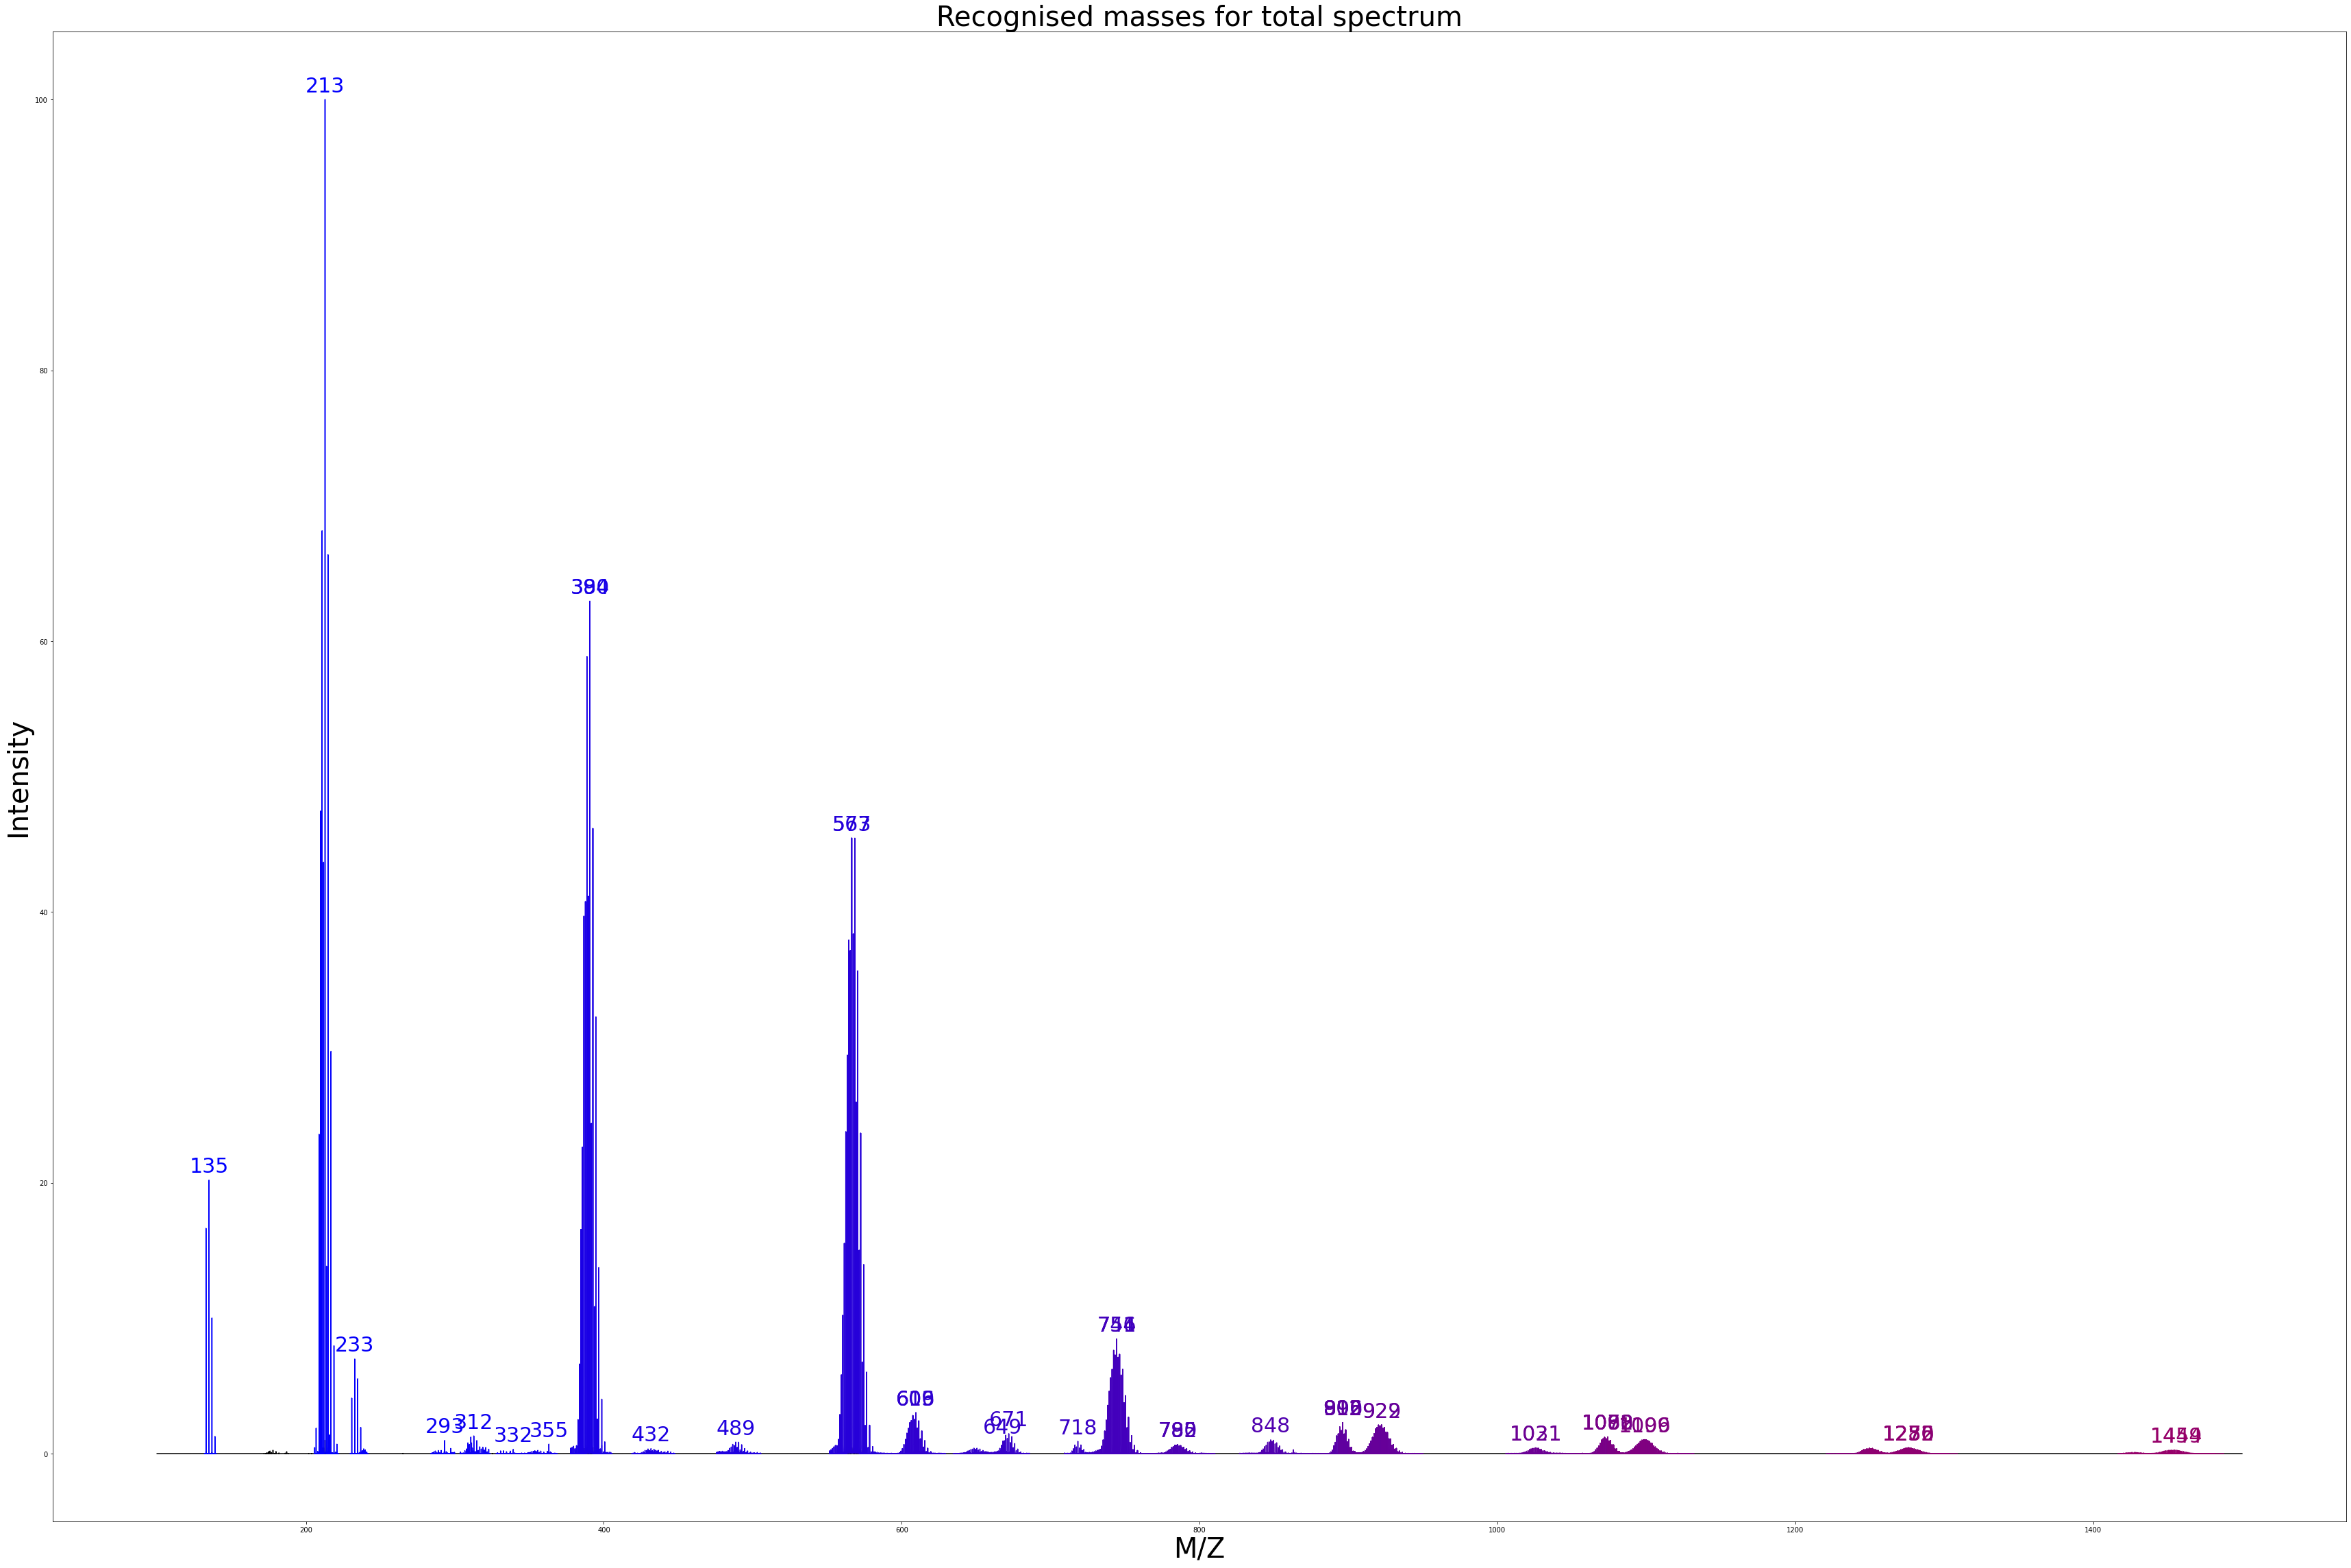

In [16]:
# Calculating total representation of found spectrum
count_entries = len(ranked)
fig, ax = plt.subplots(1, 1, figsize=(60, 40))
max_it = max(it)
ax.plot(mz, it/ max_it, color="black")
count: int = 0
c1: str = "blue"
c2: str = "red"
for mass, data in ranked.items():
    if data:
        colour = color_fader(c1, c2, mix=count / (count_entries + 1))
        it_n = (data[0]["spectrum"][1] / max_it) * 100
        ax.plot(
            data[0]["spectrum"][0], it_n, color=colour,
        )
        max_ind = np.argmax(it_n)
        height = it_n[max_ind]
        ax.text(
            data[0]["spectrum"][0][max_ind],
            height + 1,
            round(mass),
            color=colour,
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=30,
        )
        count += 1
ax.set_title(f"Recognised masses for total spectrum", fontsize=40)
ax.set_xlabel("M/Z", fontsize=40)
ax.set_ylabel("Intensity", fontsize=40)
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(f"{path}/total.png", dpi=300)

Mass 110.975 has found 0
Mass 134.604 has found 1
Mass 171.461 has found 0
Mass 177.202 has found 0
Mass 186.795 has found 0
Mass 198.539 has found 0
Mass 205.334 has found 0
Mass 212.606 has found 1
Mass 218.951 has found 0
Mass 233.314 has found 1
Mass 238.826 has found 0
Mass 250.429 has found 0
Mass 256.127 has found 0
Mass 265.244 has found 0
Mass 293.137 has found 1
Mass 306.709 has found 0
Mass 311.992 has found 1
Mass 318.606 has found 0
Mass 323.303 has found 0
Mass 331.678 has found 1
Mass 339.198 has found 0
Mass 354.749 has found 2
Mass 363.124 has found 0
Mass 377.705 has found 0
Mass 384.121 has found 1
Mass 390.103 has found 1
Mass 397.218 has found 0
Mass 431.838 has found 2
Mass 488.634 has found 2
Mass 494.827 has found 0
Mass 553.631 has found 0
Mass 559.634 has found 0
Mass 566.586 has found 5
Mass 573.478 has found 5


c:\users\anton_bondarenko1\desktop\projects\msaris\venv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Mass 578.803 has found 0
Mass 603.002 has found 1
Mass 608.944 has found 3
Mass 615.781 has found 1
Mass 649.161 has found 3
Mass 654.538 has found 0
Mass 666.133 has found 0
Mass 671.328 has found 1
Mass 677.744 has found 0
Mass 718.308 has found 1
Mass 732.928 has found 0
Mass 737.427 has found 0
Mass 744.33 has found 9
Mass 751.491 has found 4
Mass 756.42 has found 2
Mass 779.857 has found 1
Mass 785.323 has found 7
Mass 791.529 has found 5
Mass 842.327 has found 0
Mass 848.049 has found 1
Mass 854.078 has found 0
Mass 863.061 has found 0
Mass 890.395 has found 6
Mass 895.782 has found 10
Mass 901.868 has found 5
Mass 911.567 has found 1
Mass 915.263 has found 2
Mass 922.038 has found 12
Mass 929.197 has found 7
Mass 1020.595 has found 1
Mass 1025.746 has found 0
Mass 1031.283 has found 1
Mass 1067.778 has found 8
Mass 1073.481 has found 15
Mass 1079.679 has found 11
Mass 1092.292 has found 3
Mass 1098.959 has found 19
Mass 1105.824 has found 15
Mass 1249.966 has found 16
Mass 1255.

KeyboardInterrupt: 

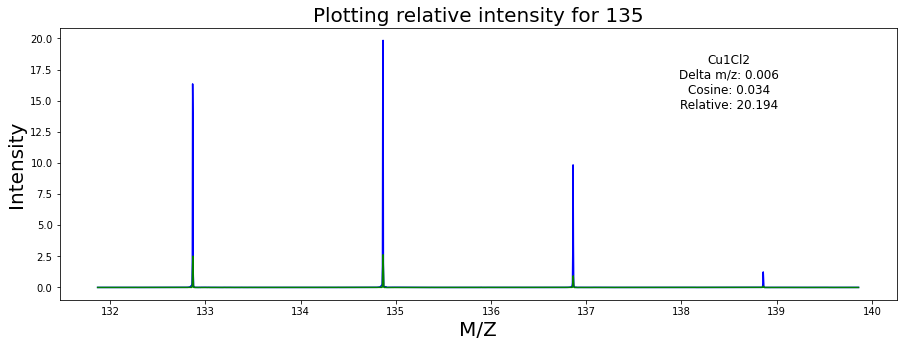

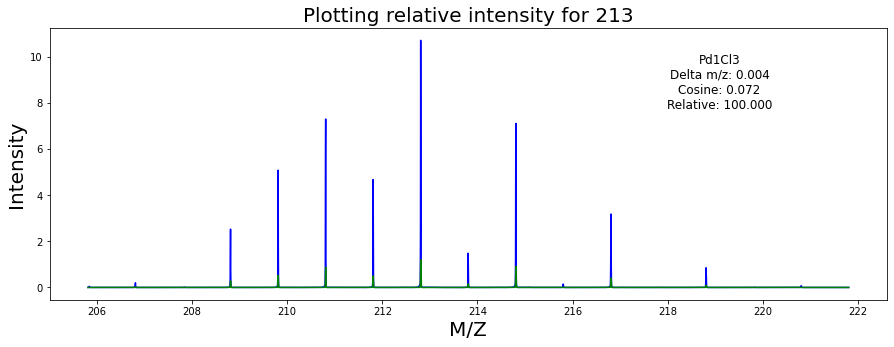

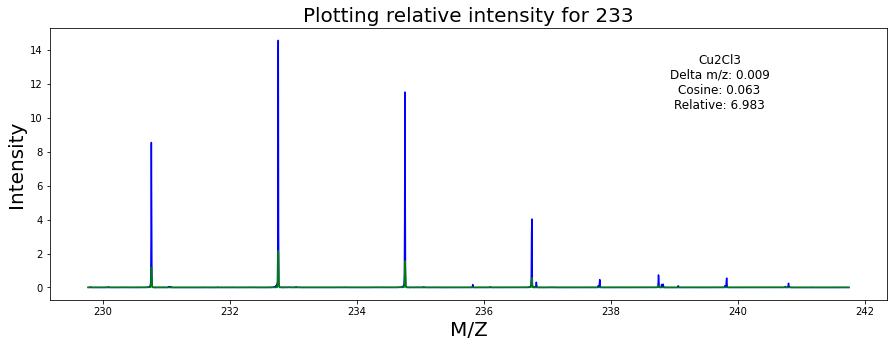

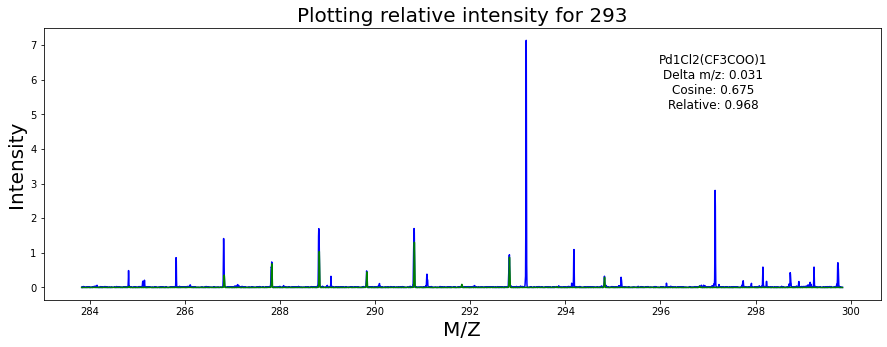

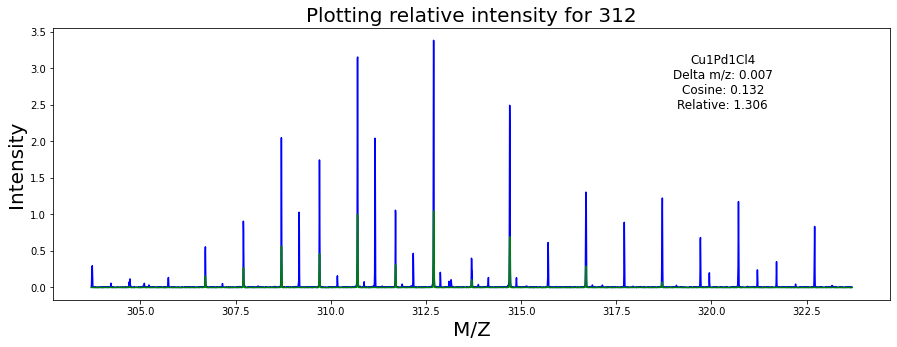

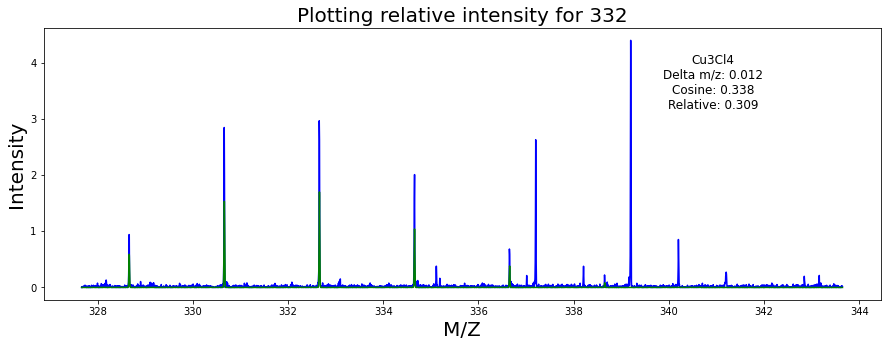

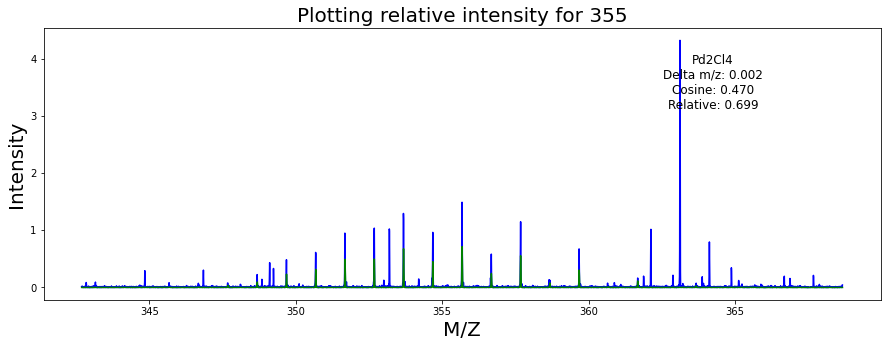

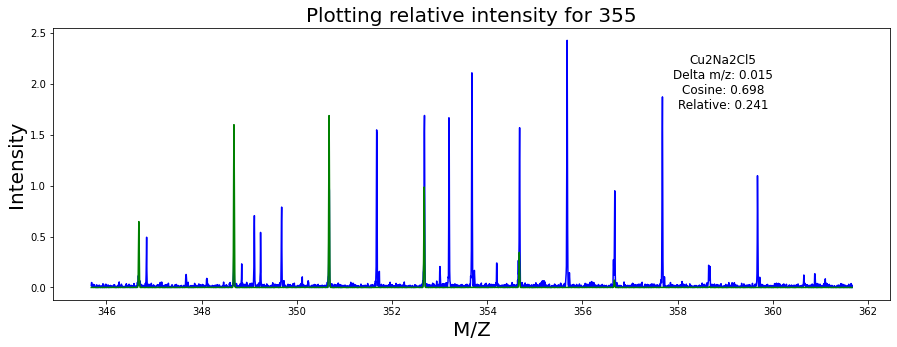

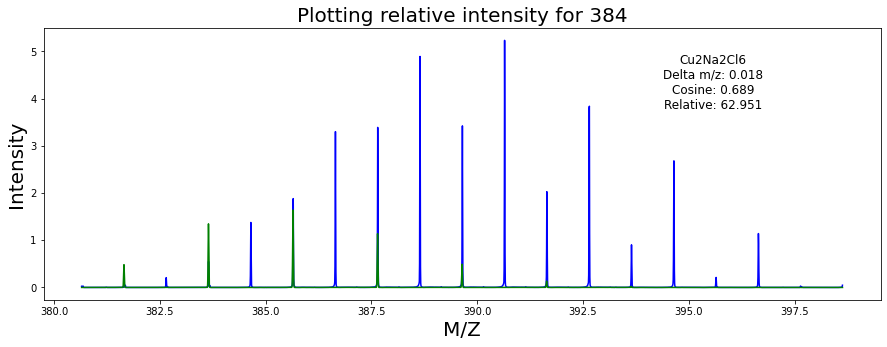

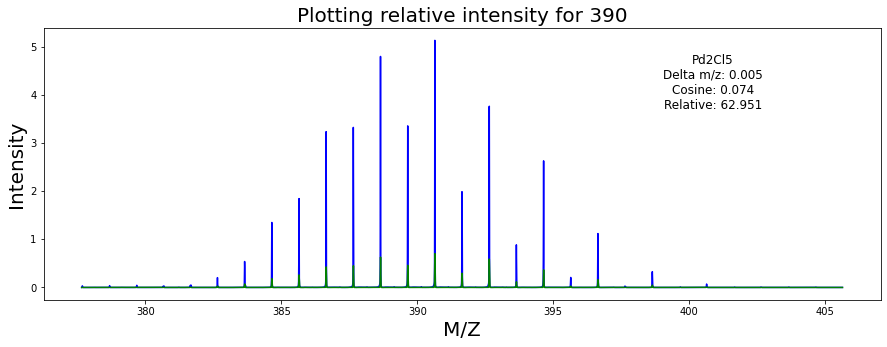

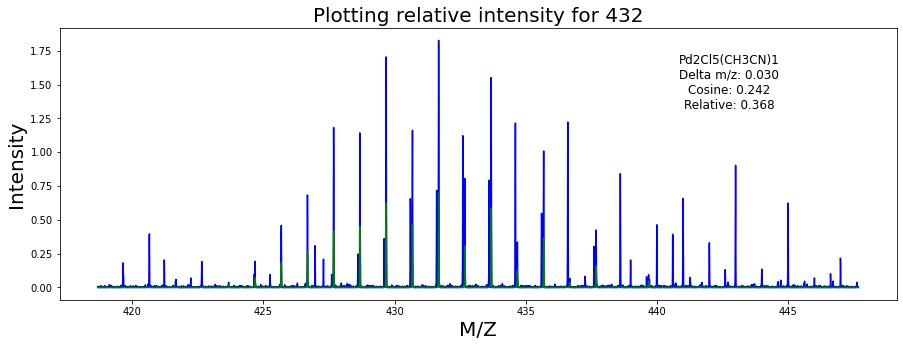

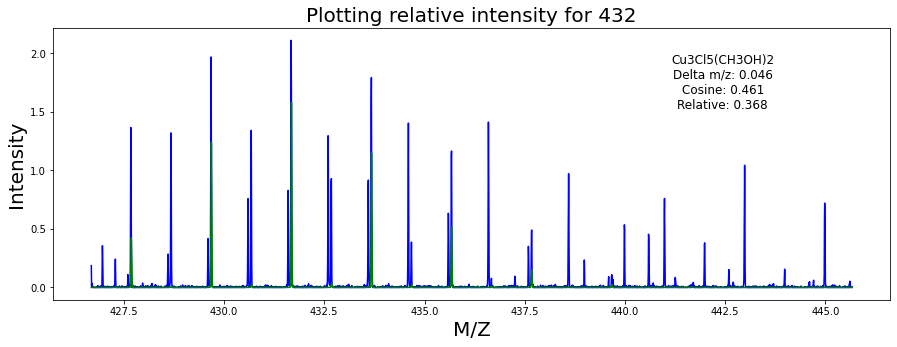

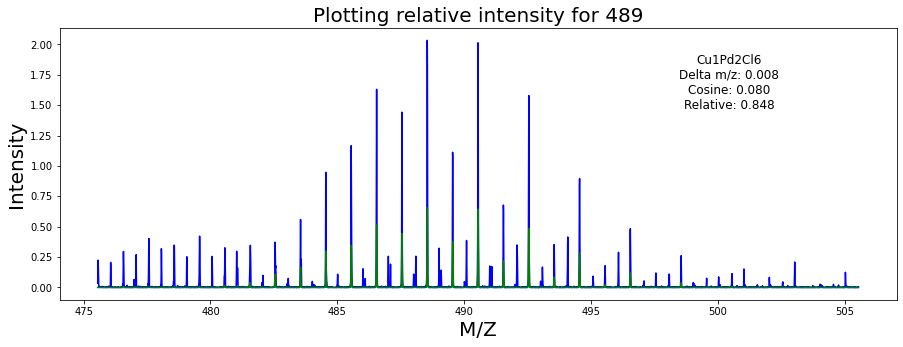

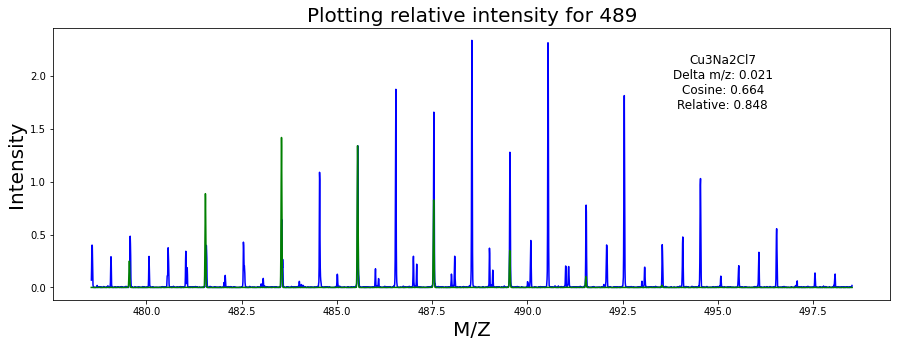

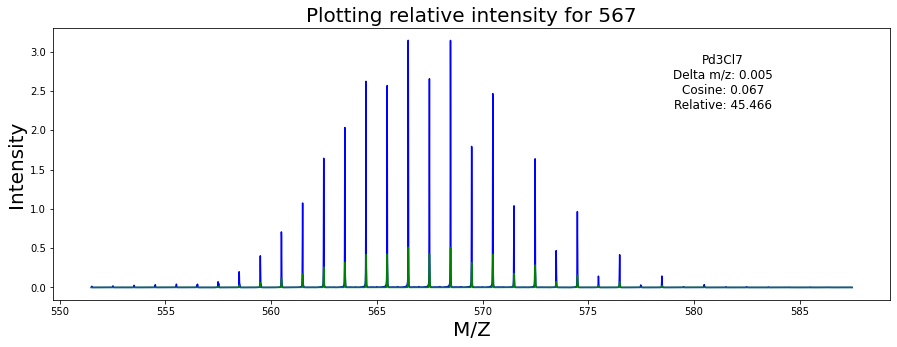

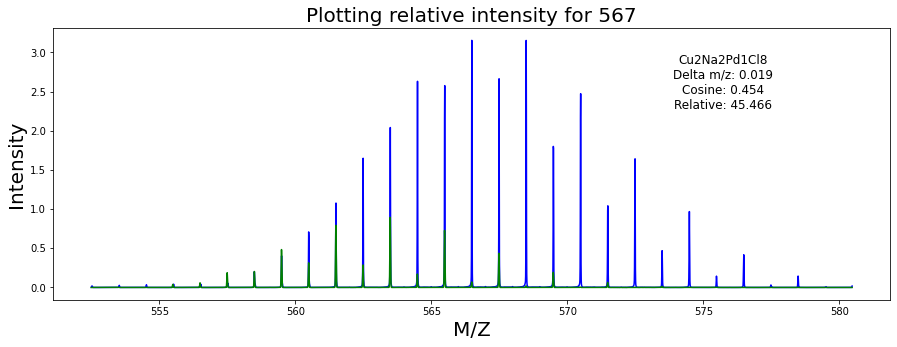

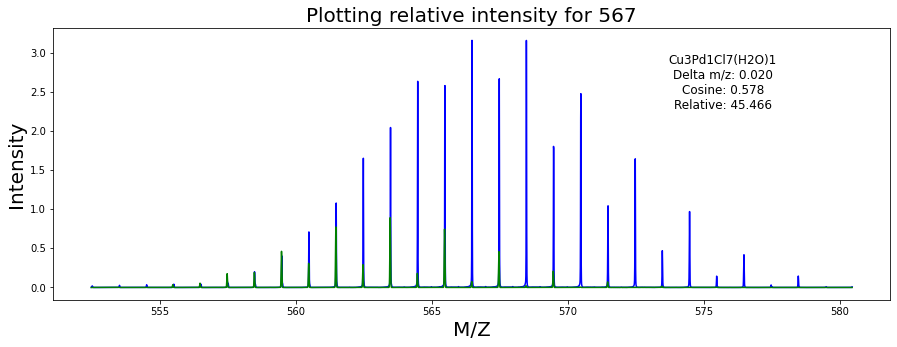

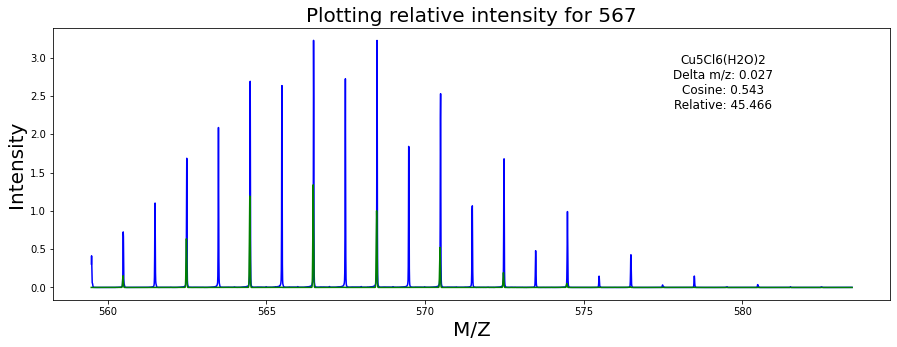

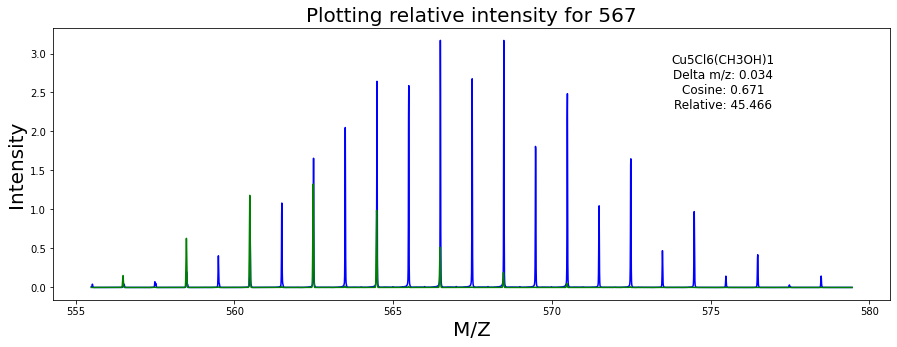

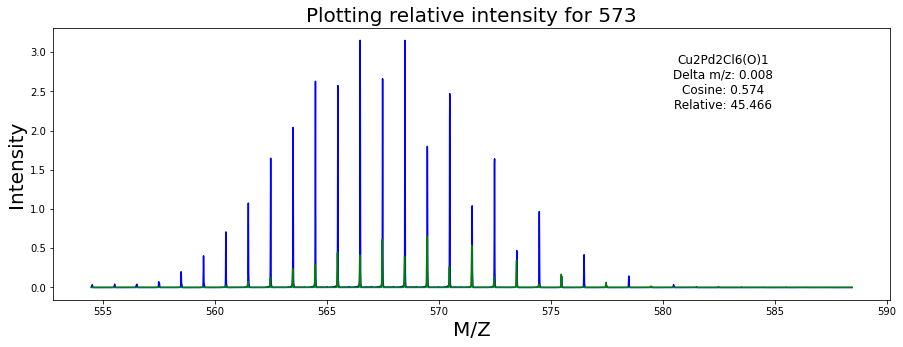

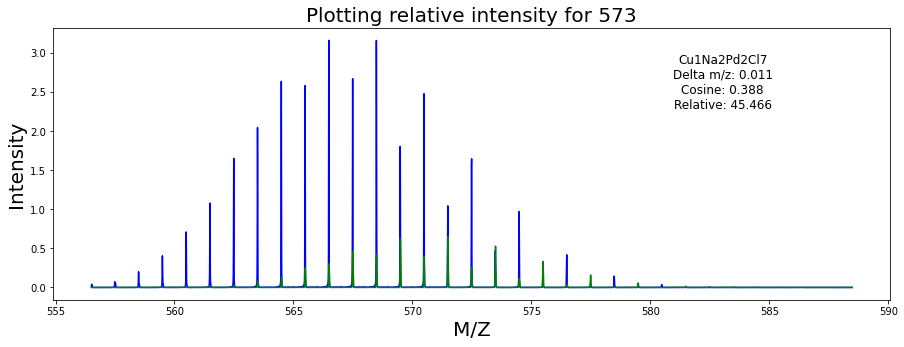

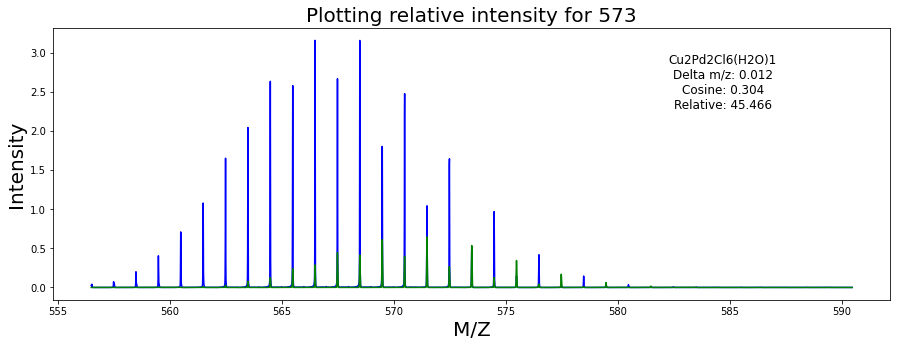

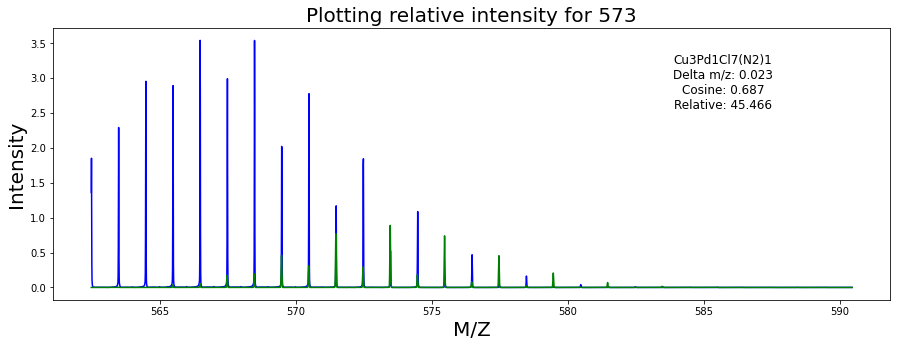

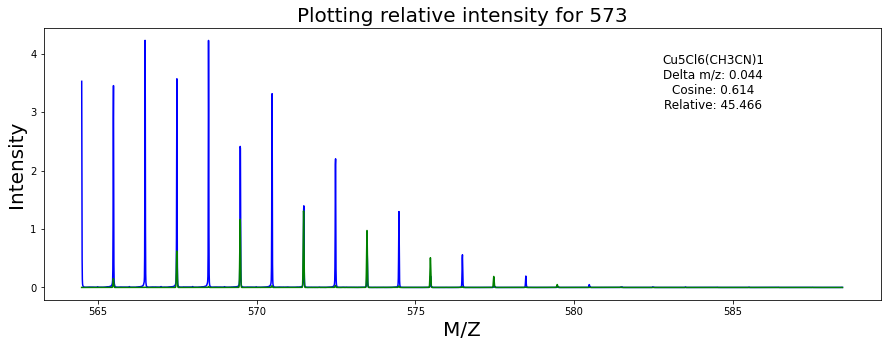

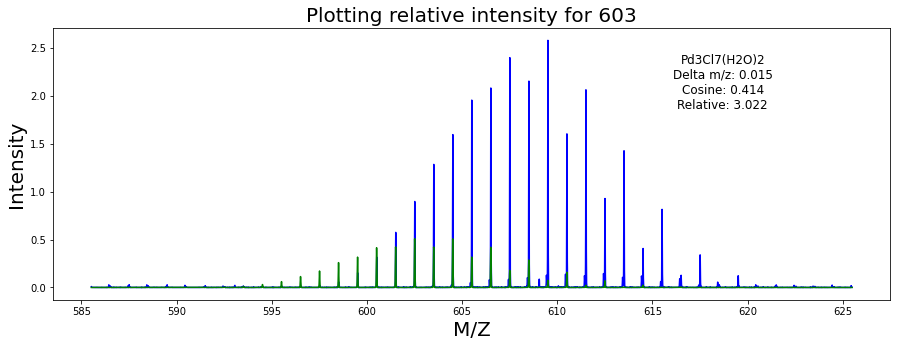

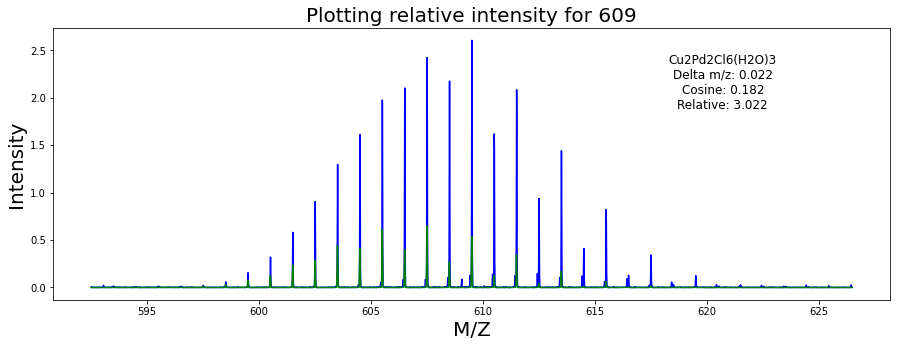

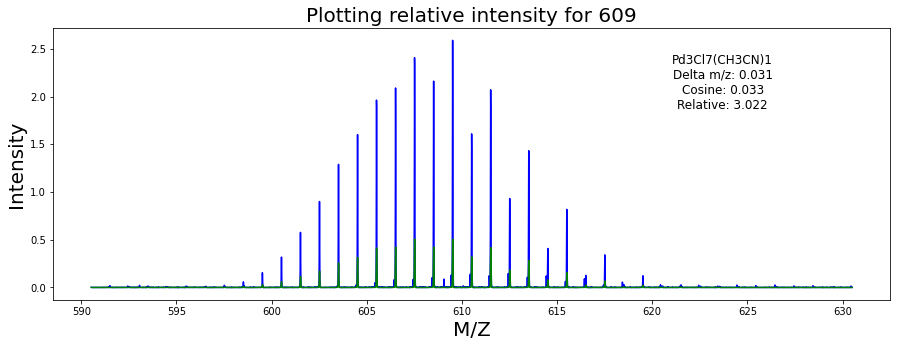

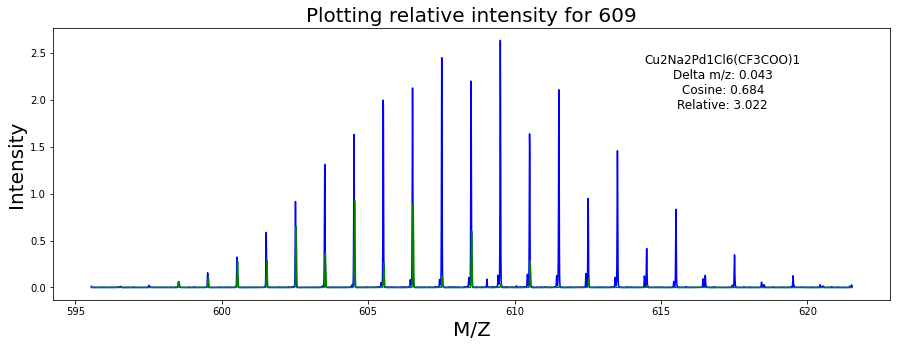

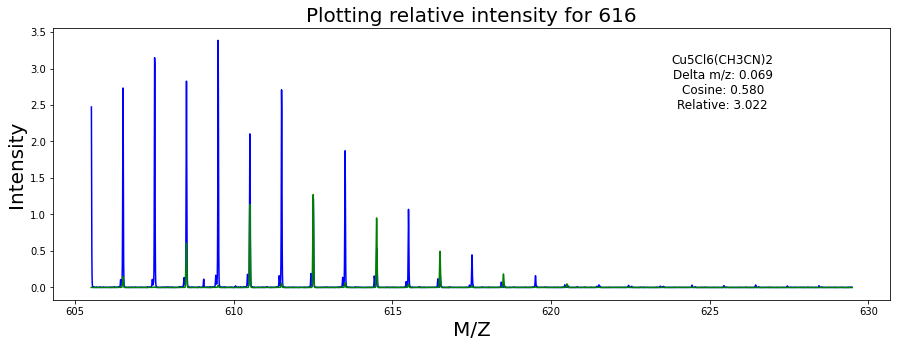

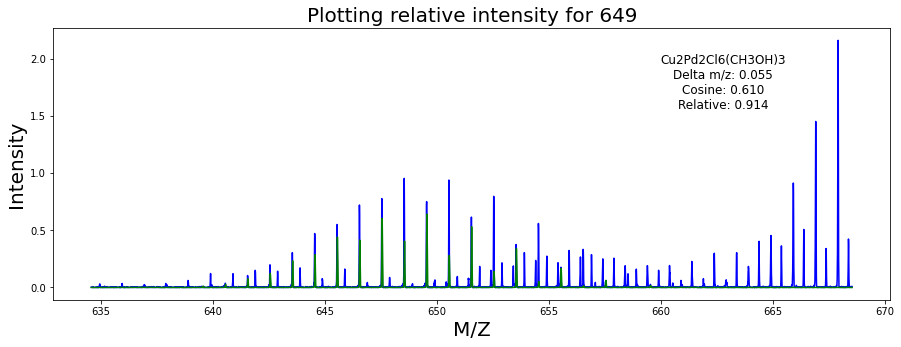

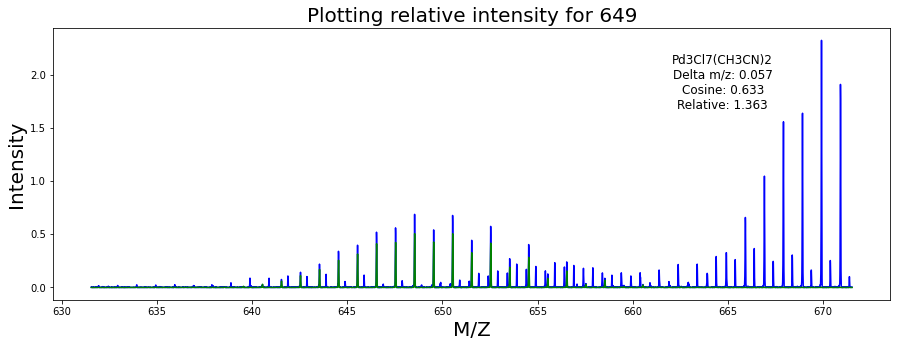

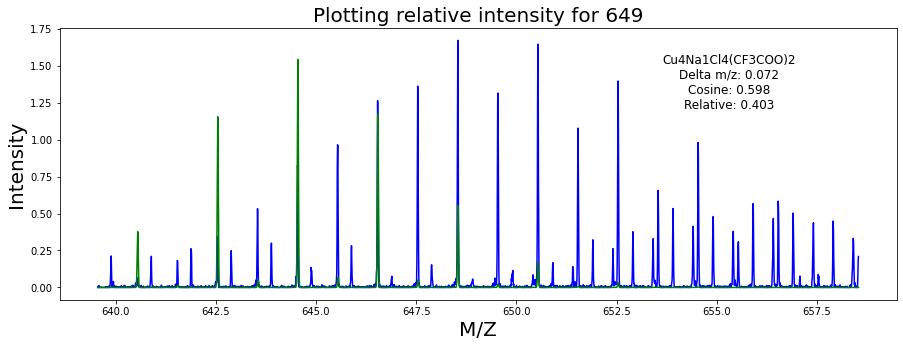

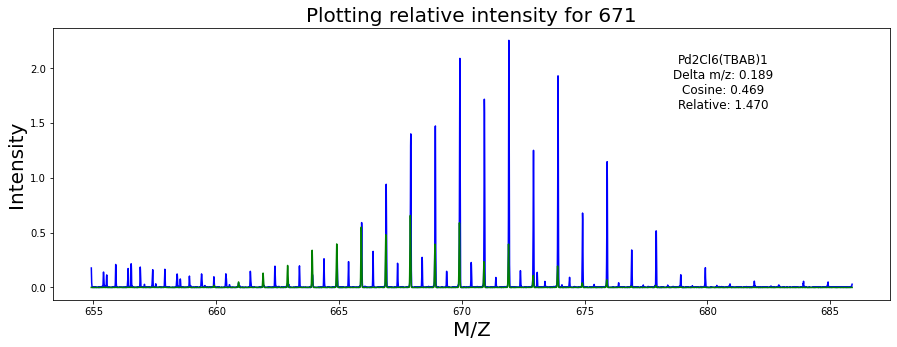

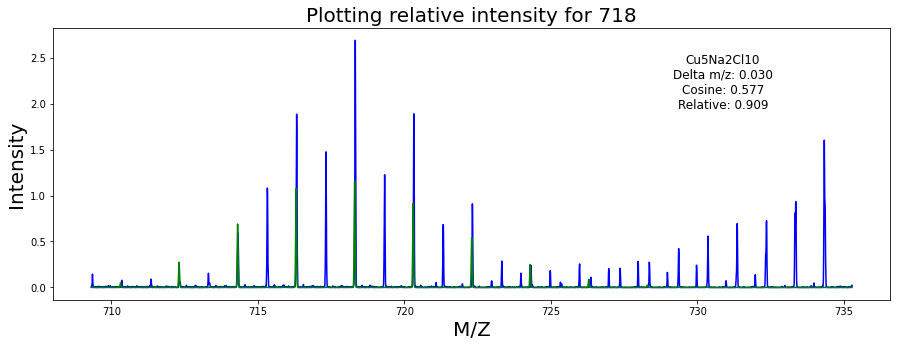

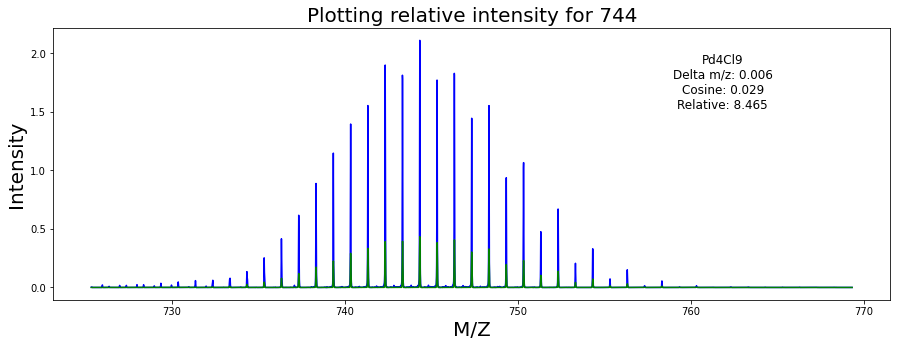

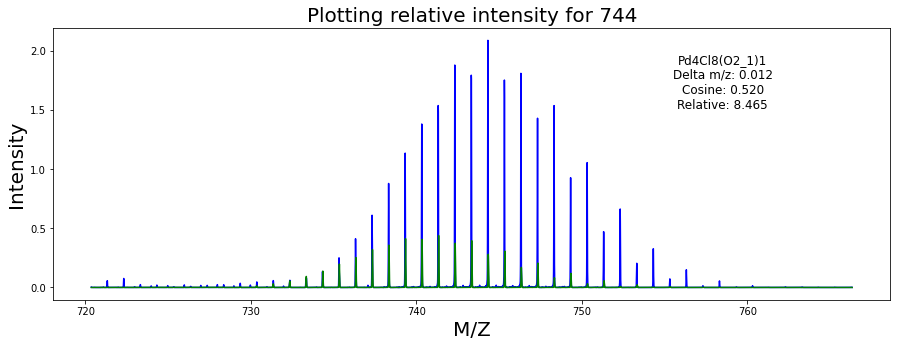

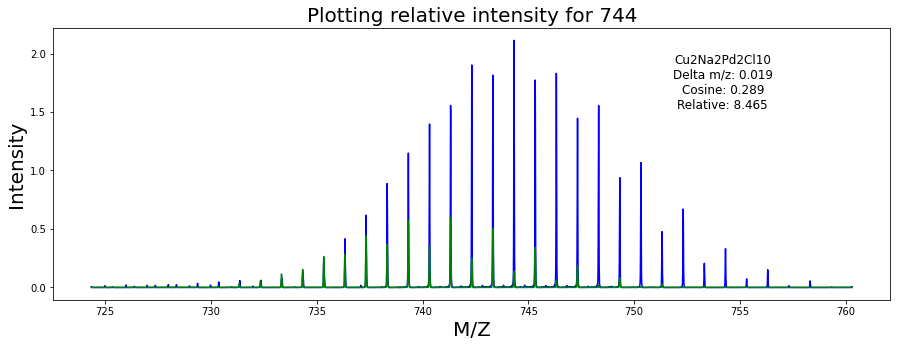

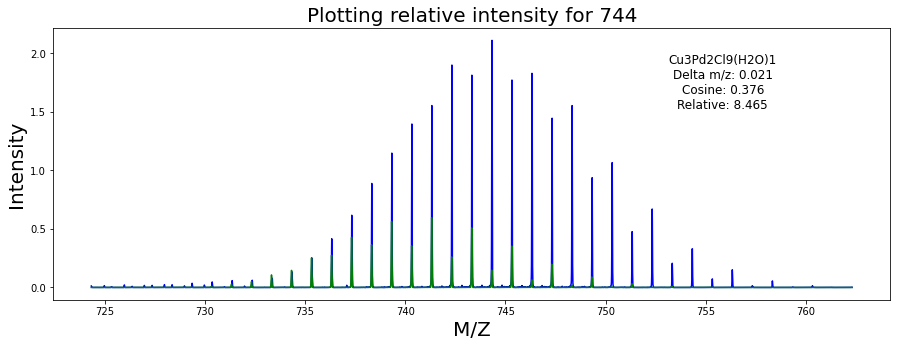

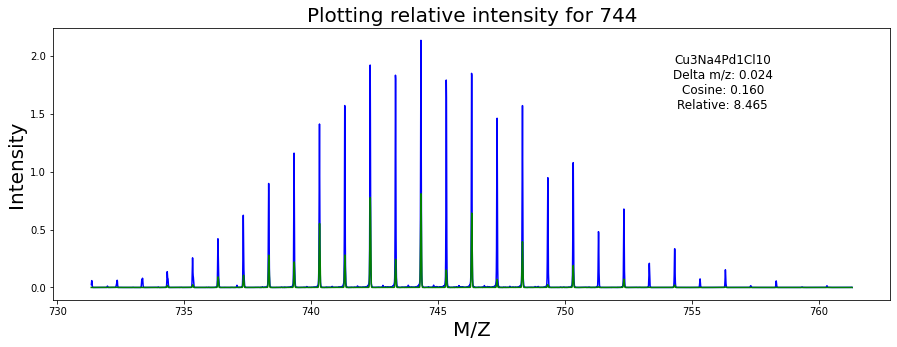

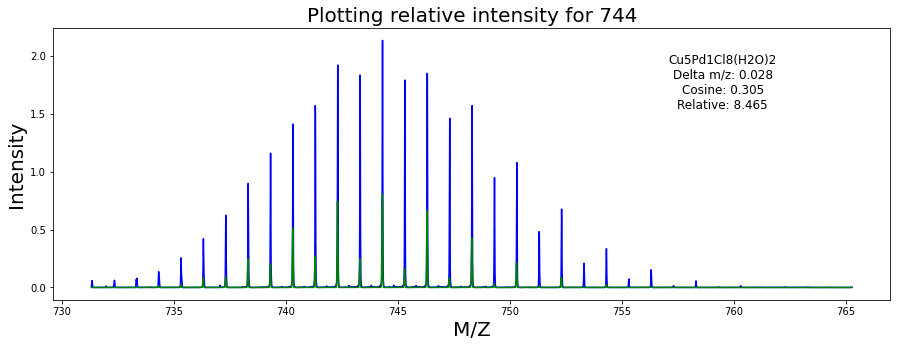

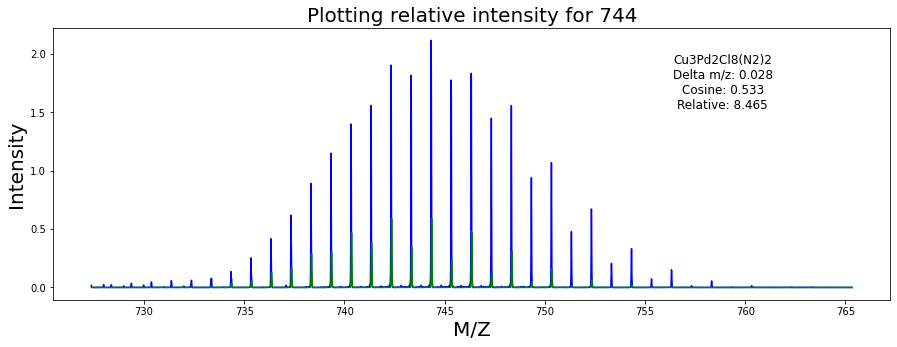

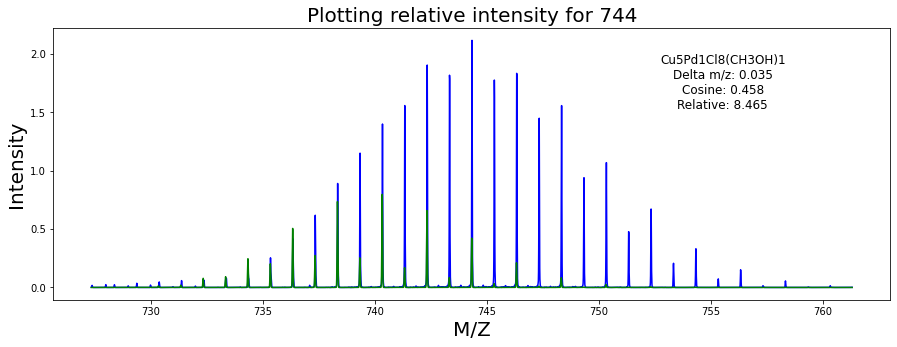

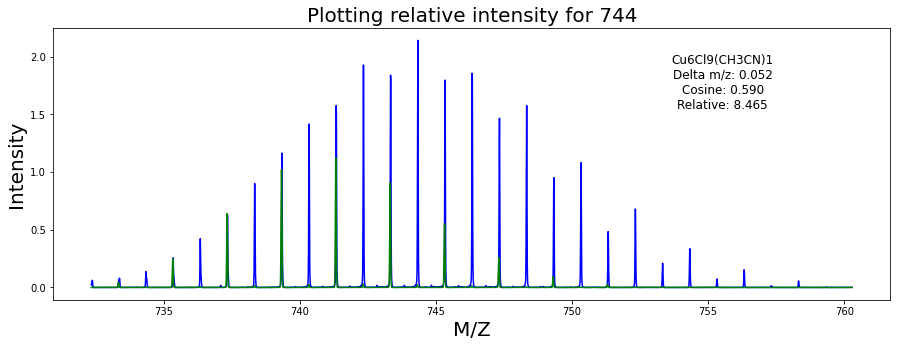

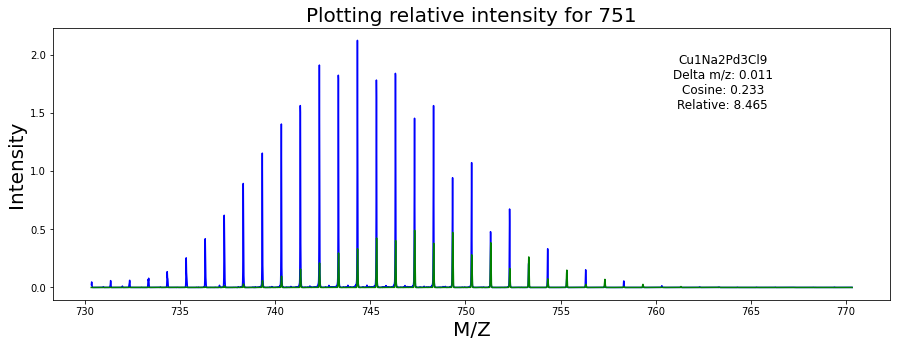

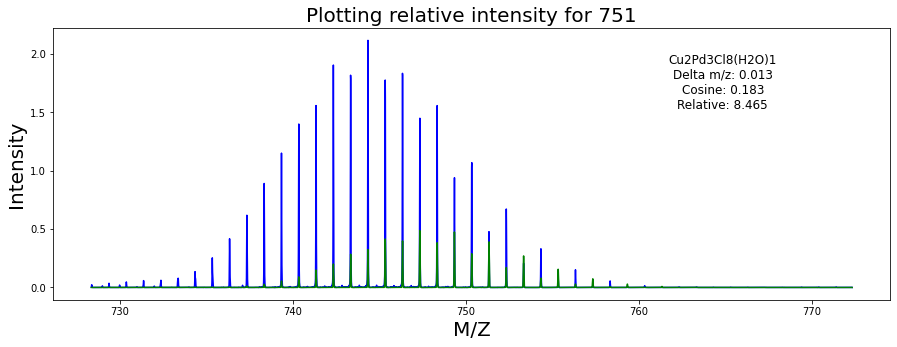

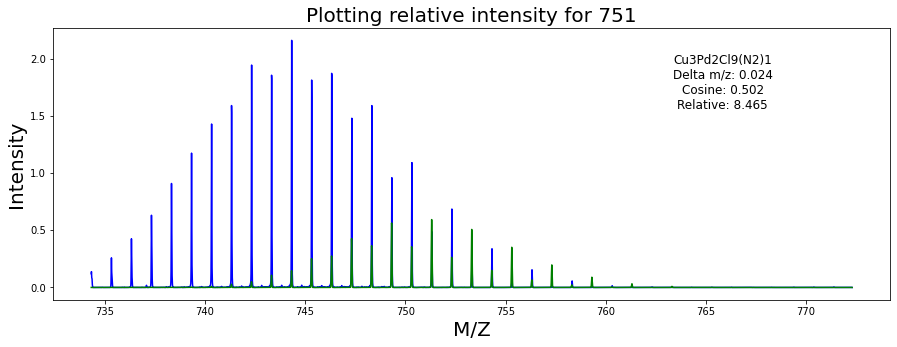

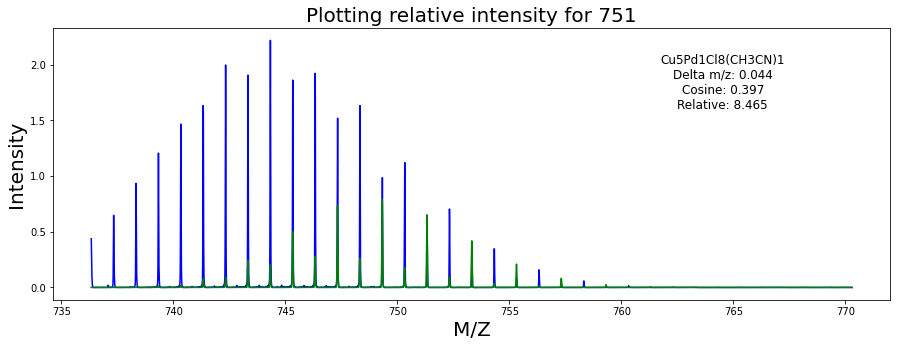

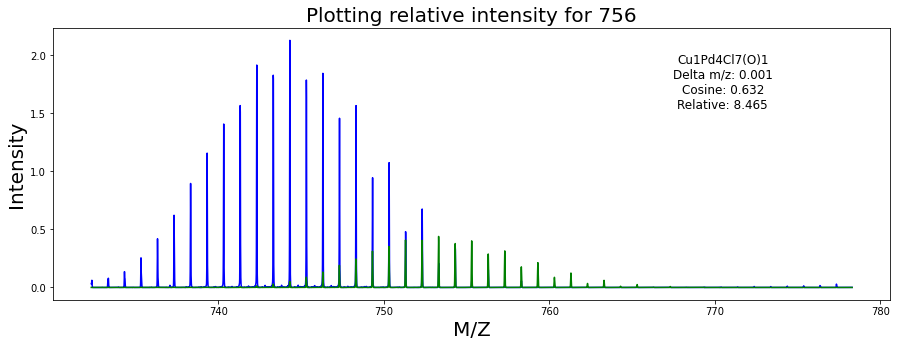

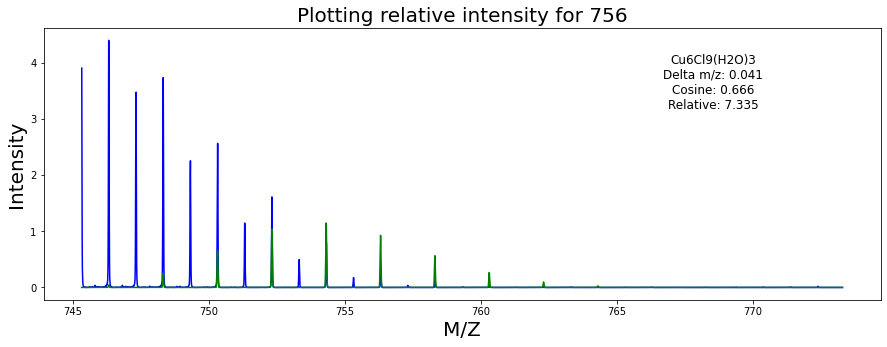

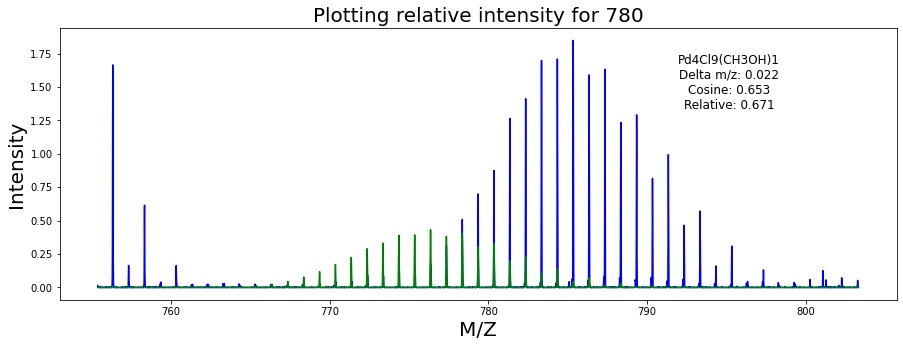

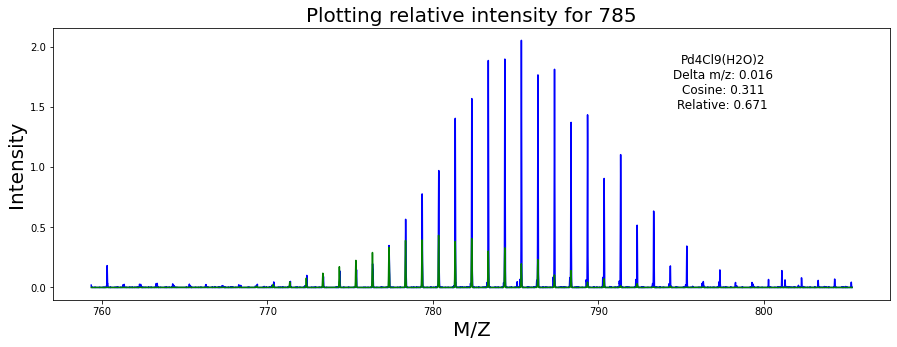

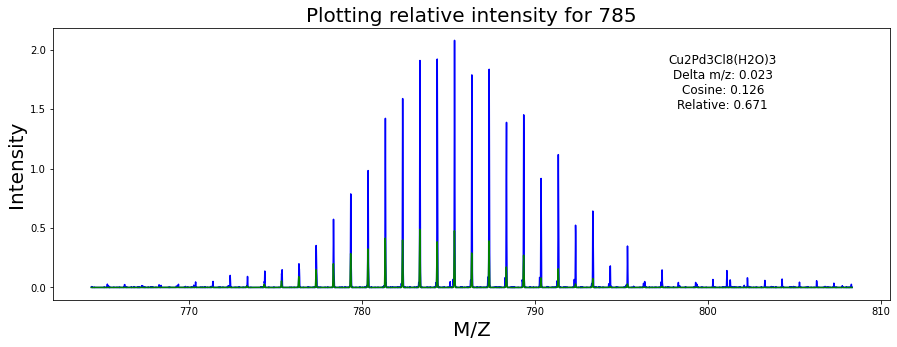

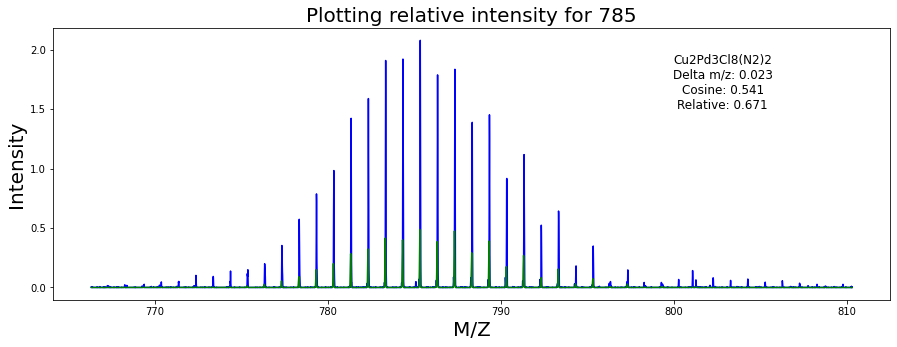

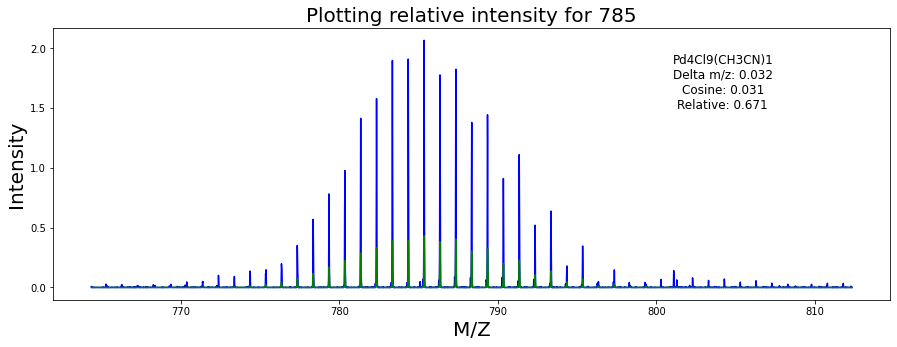

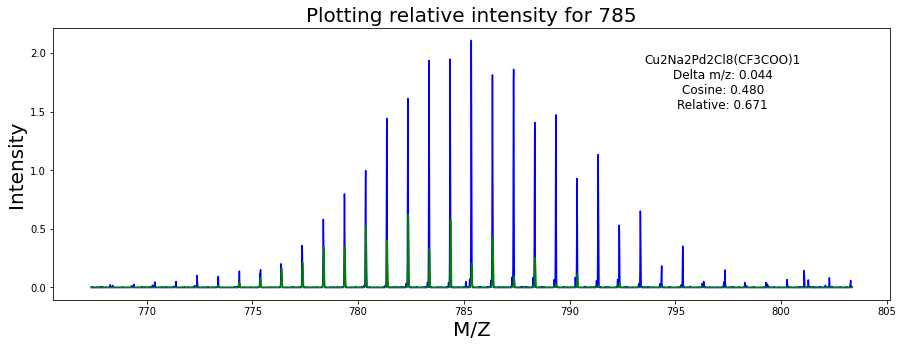

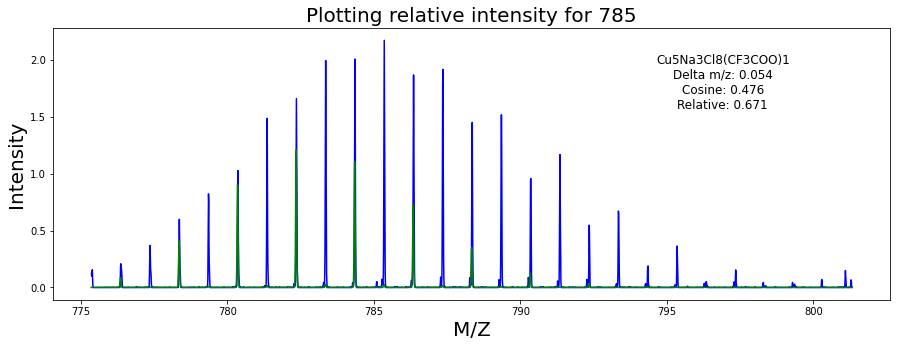

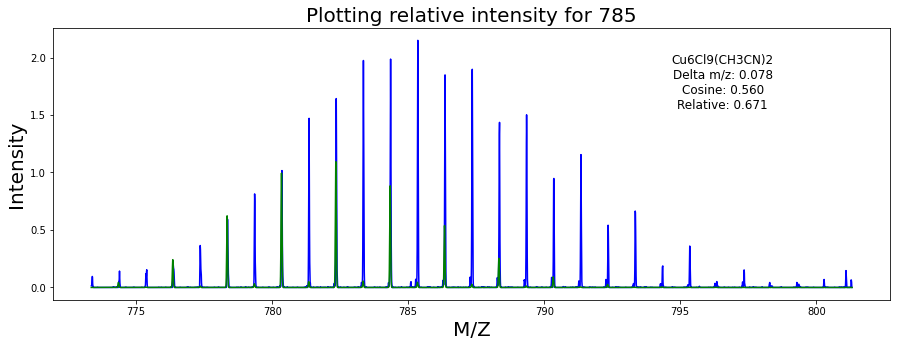

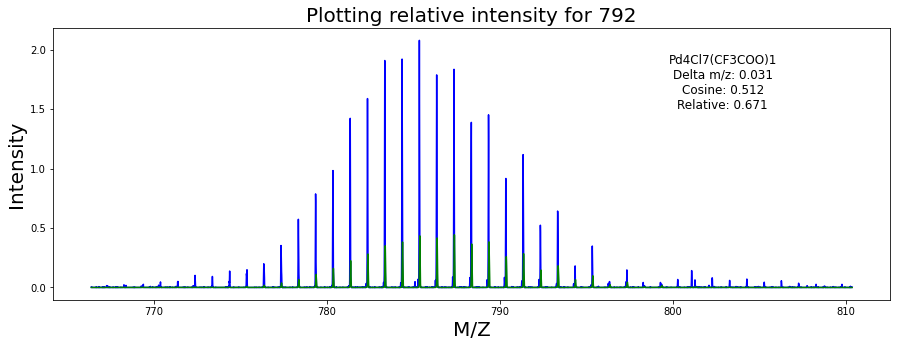

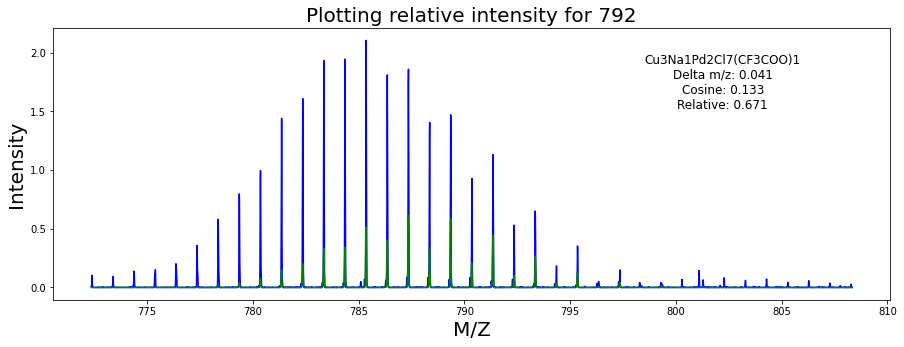

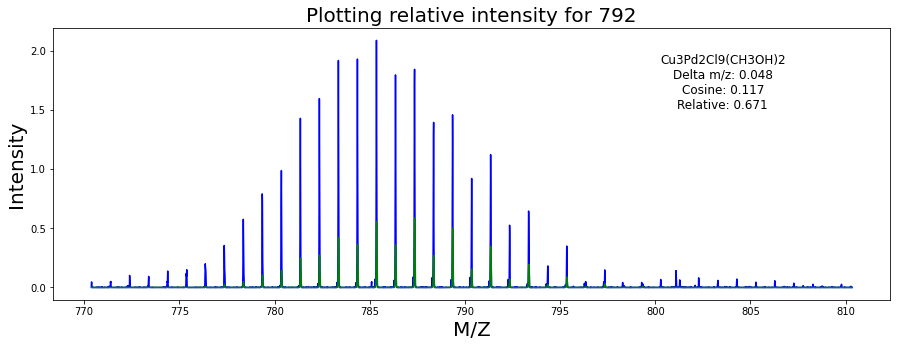

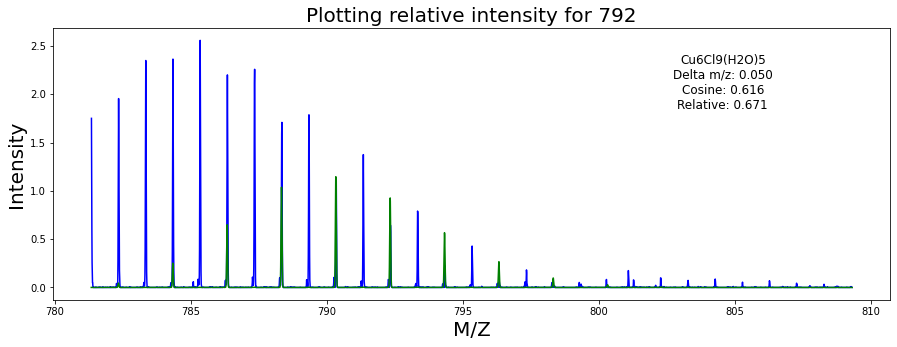

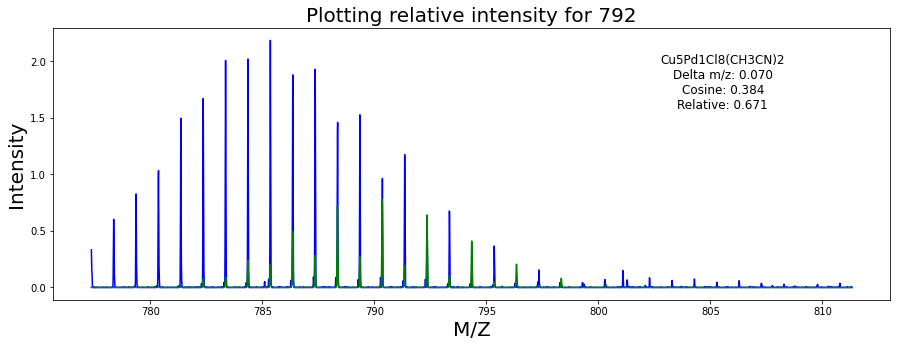

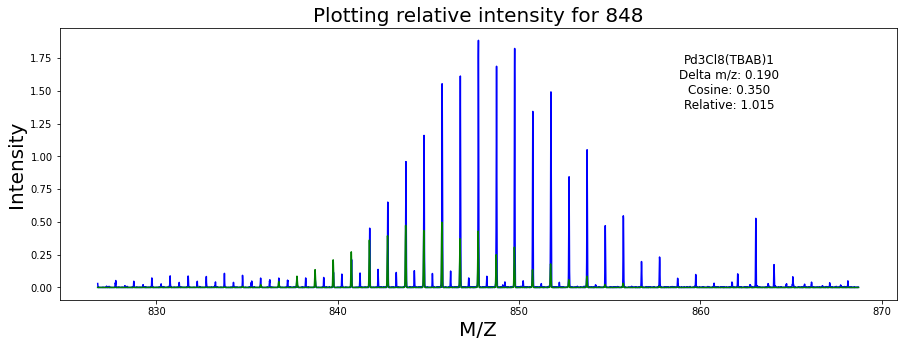

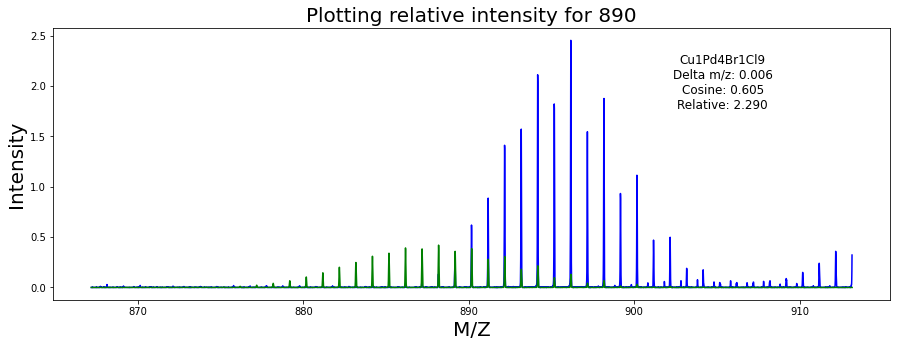

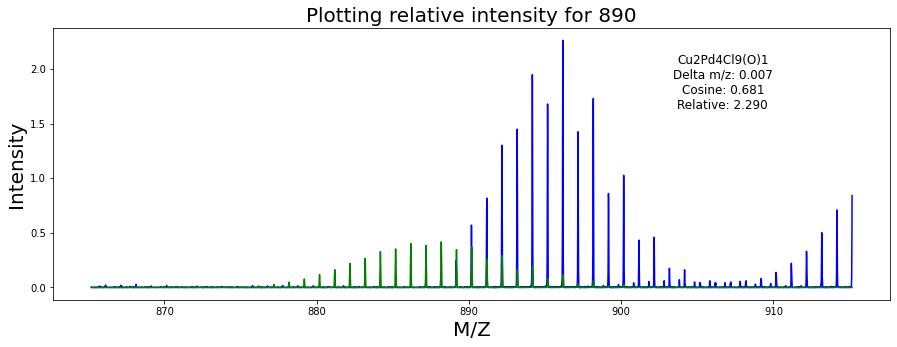

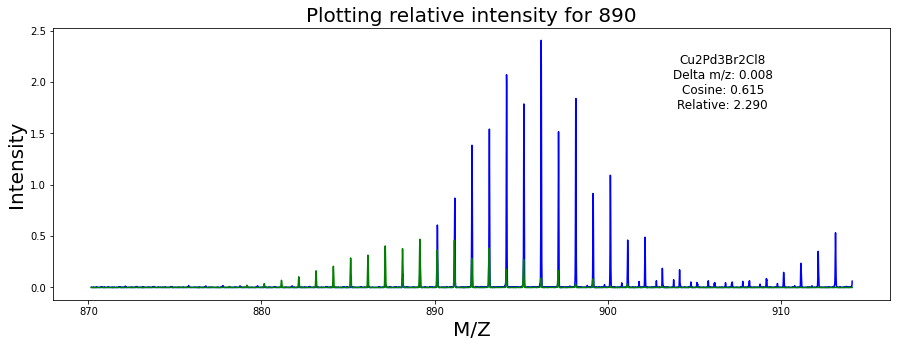

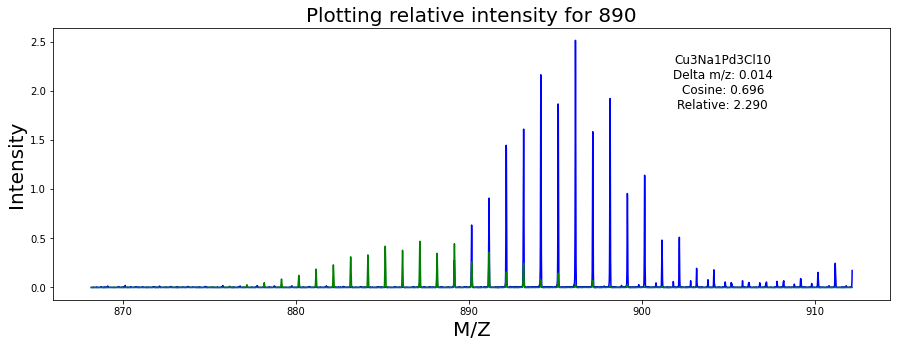

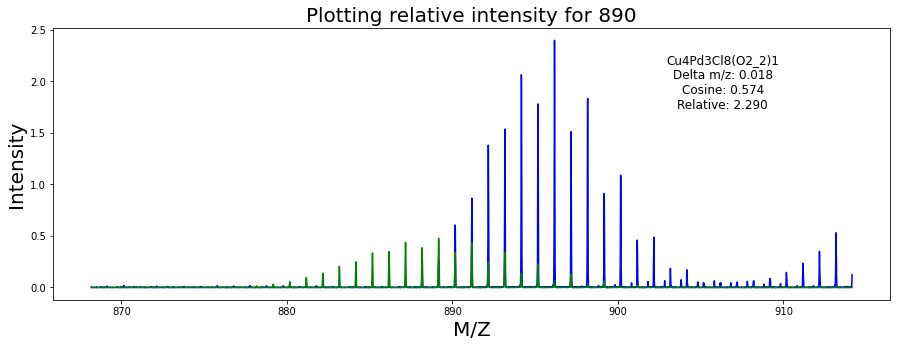

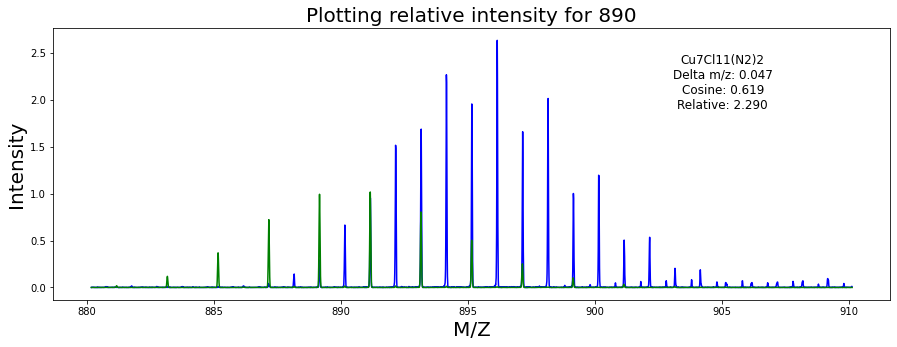

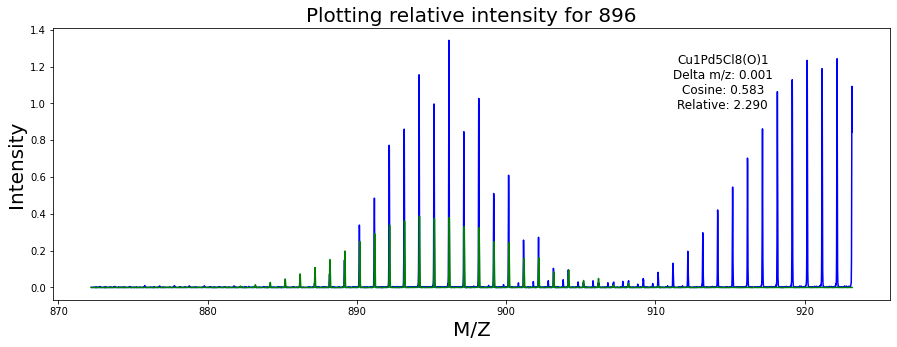

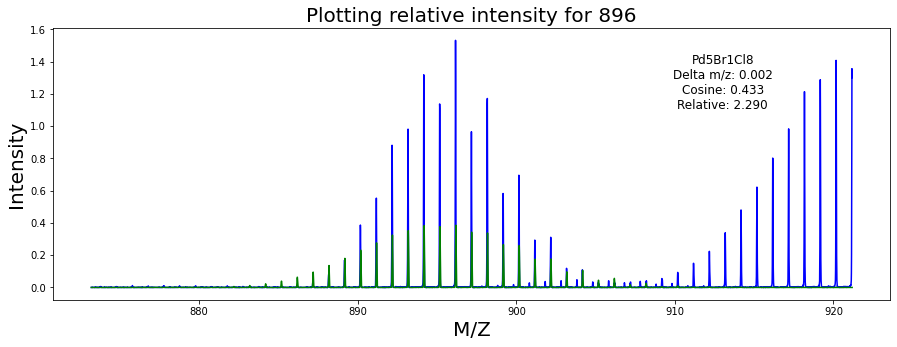

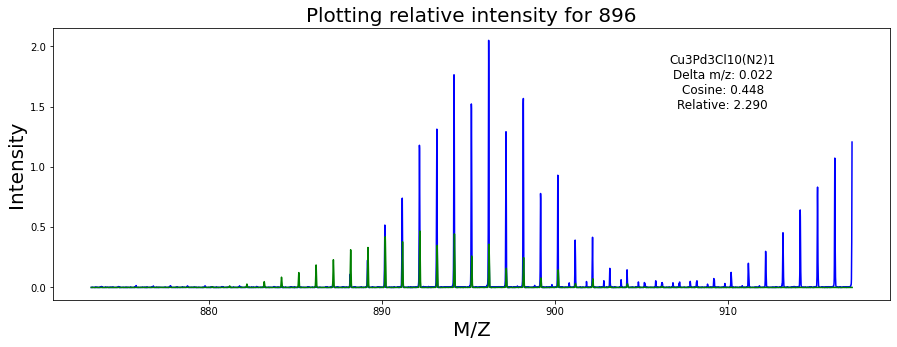

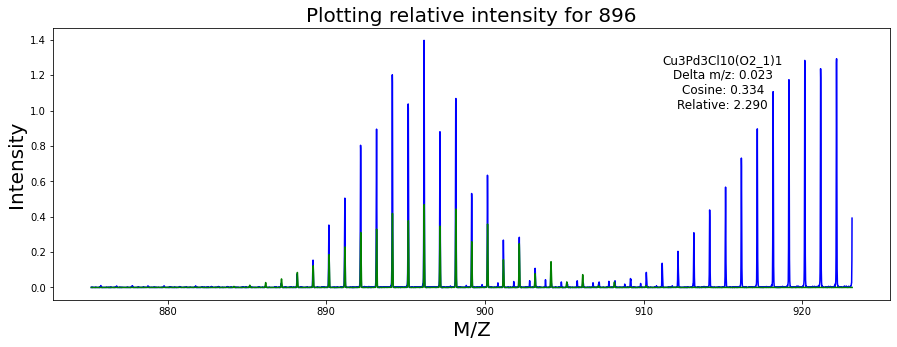

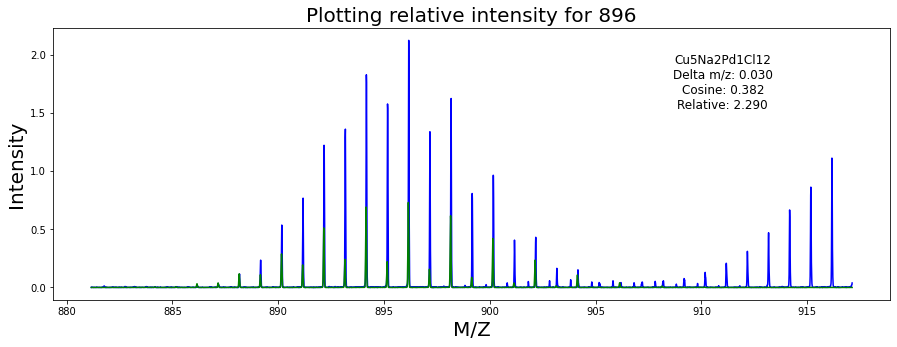

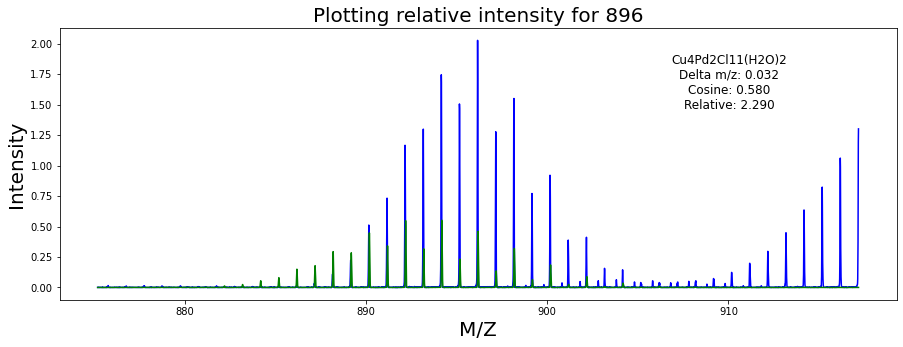

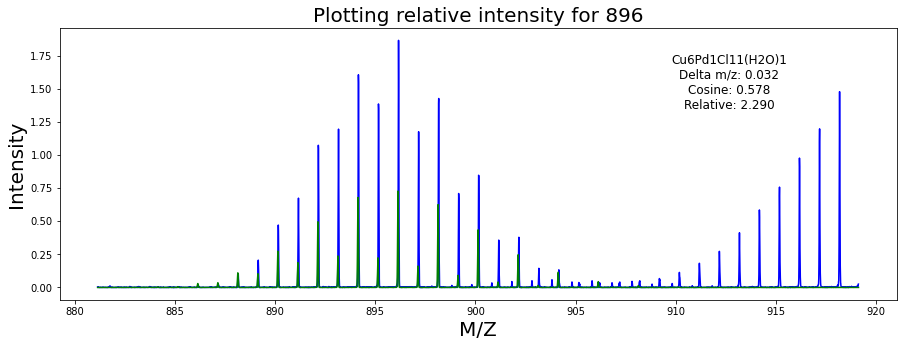

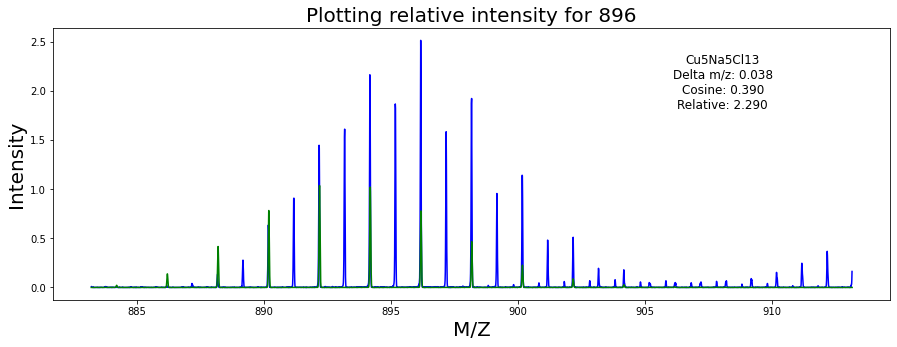

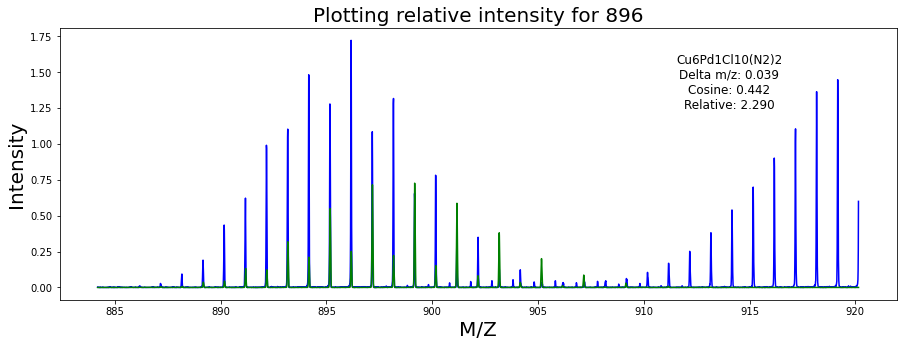

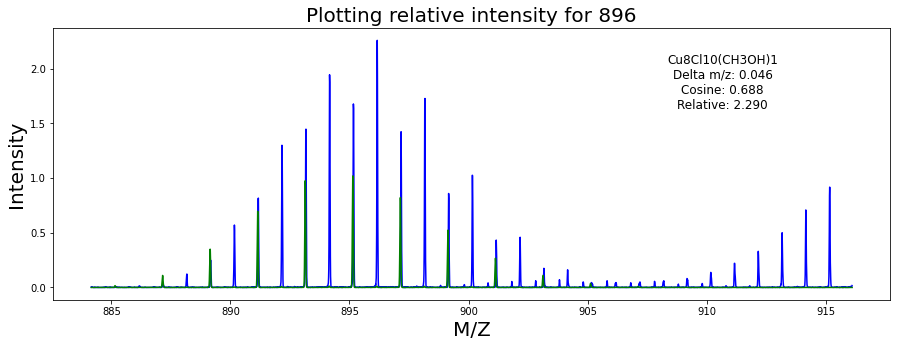

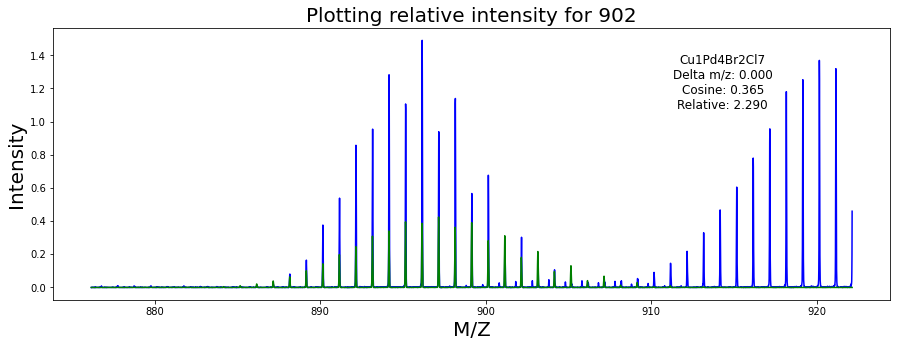

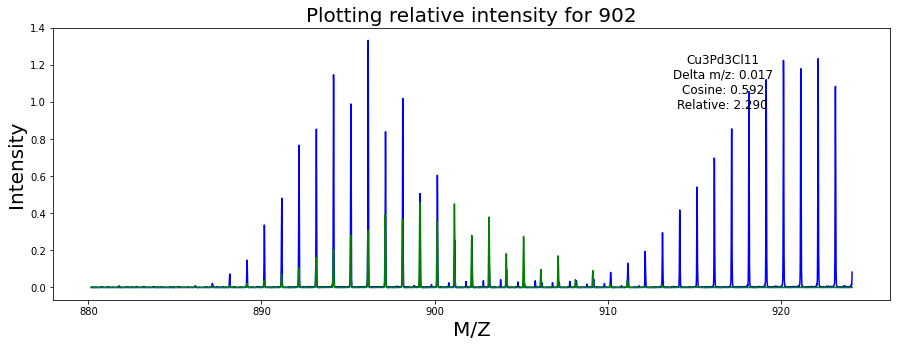

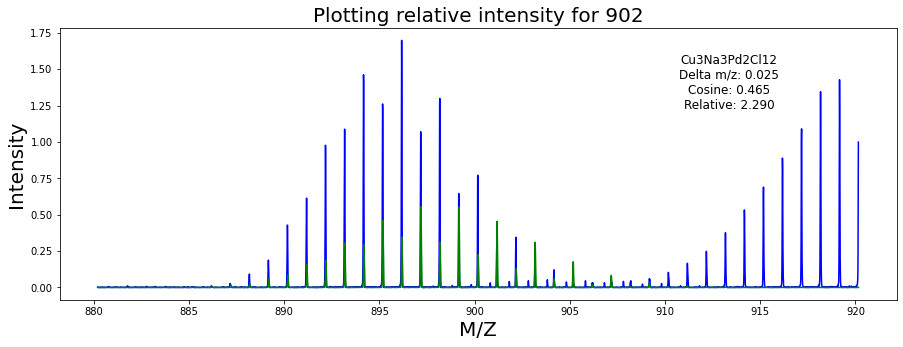

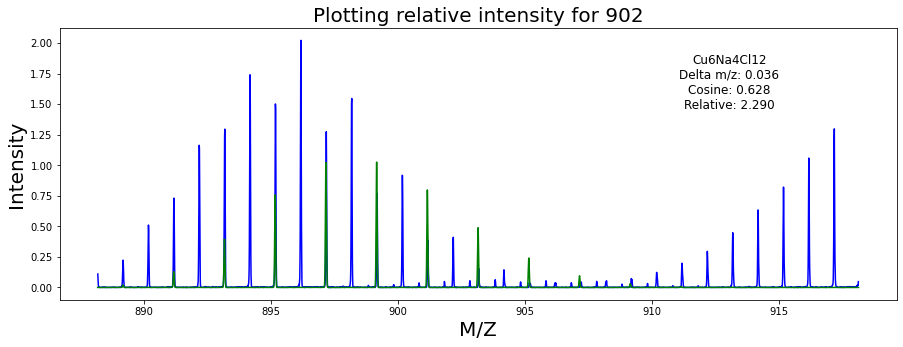

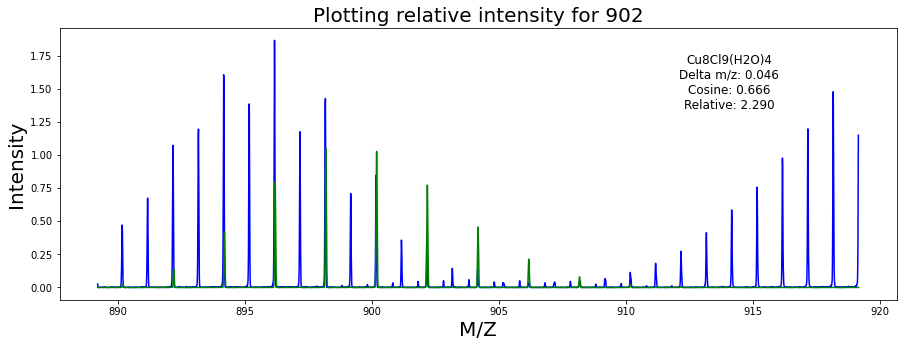

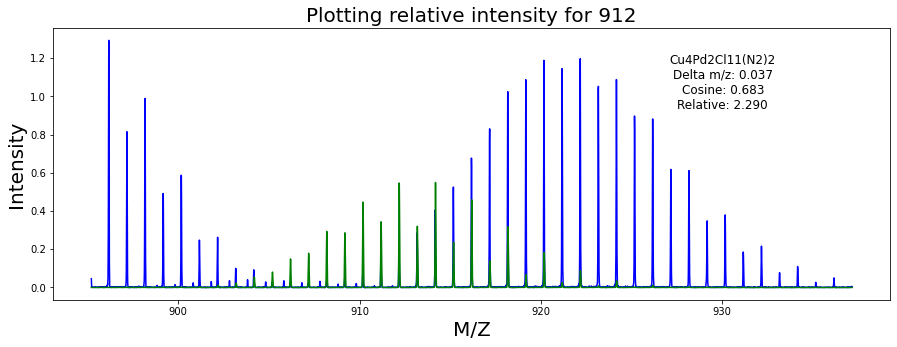

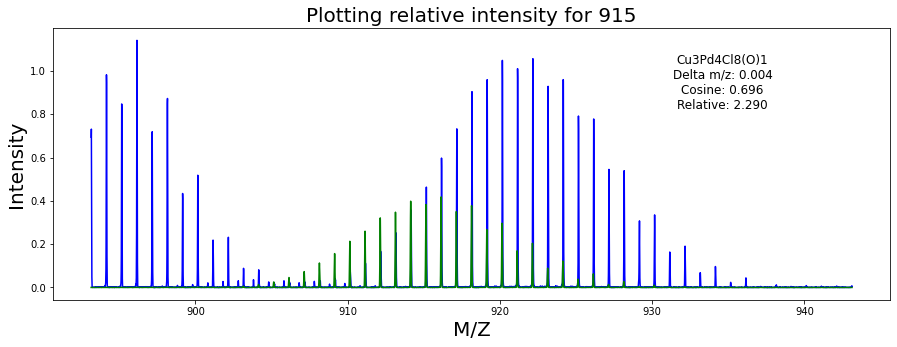

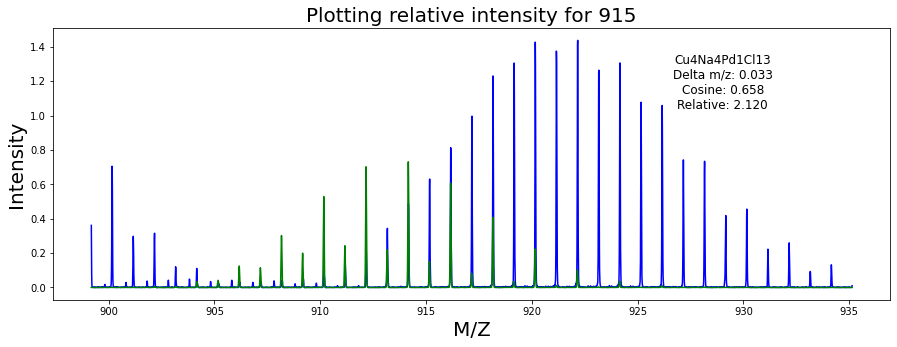

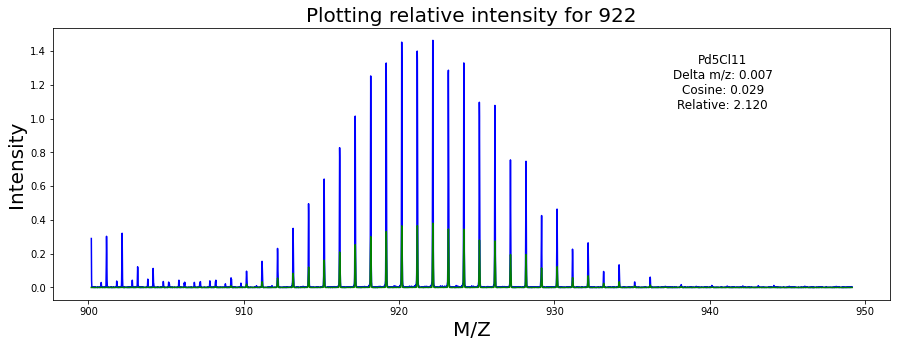

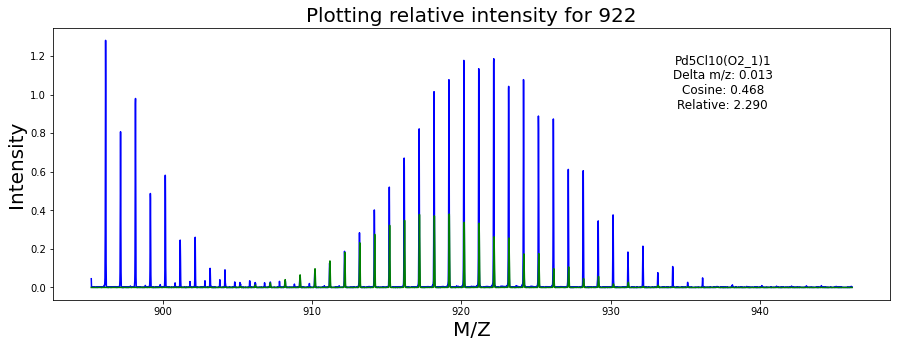

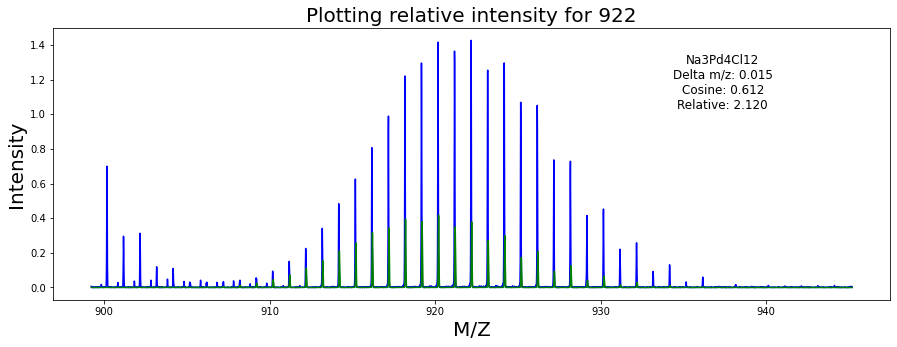

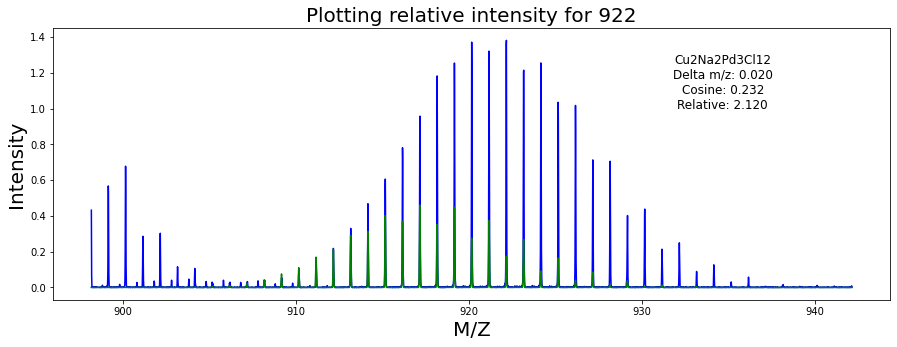

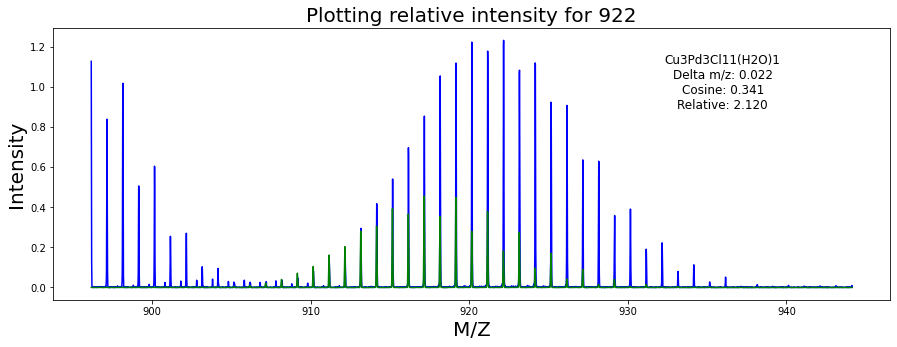

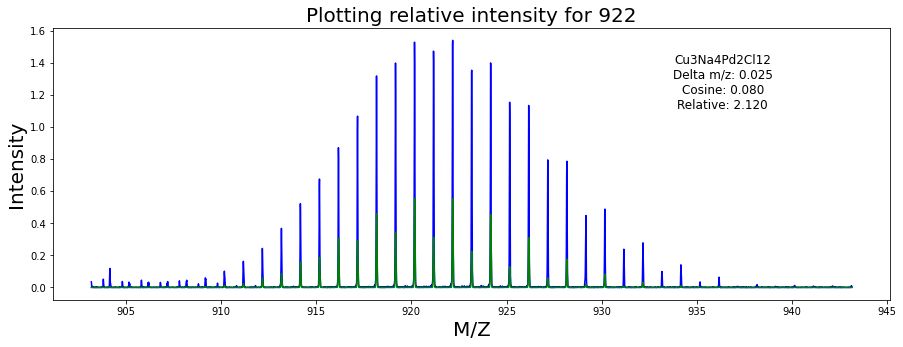

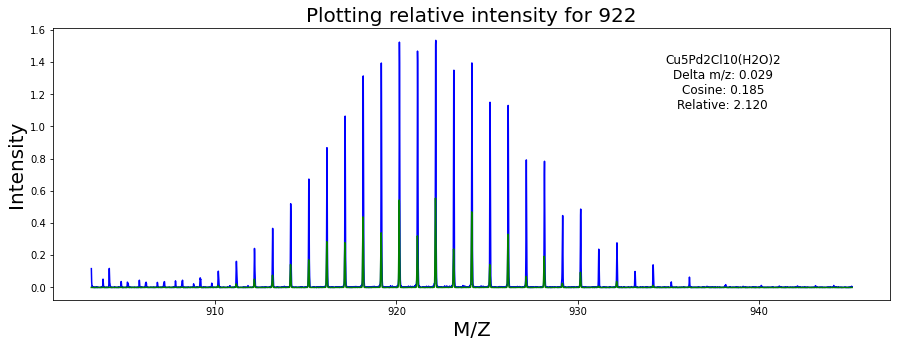

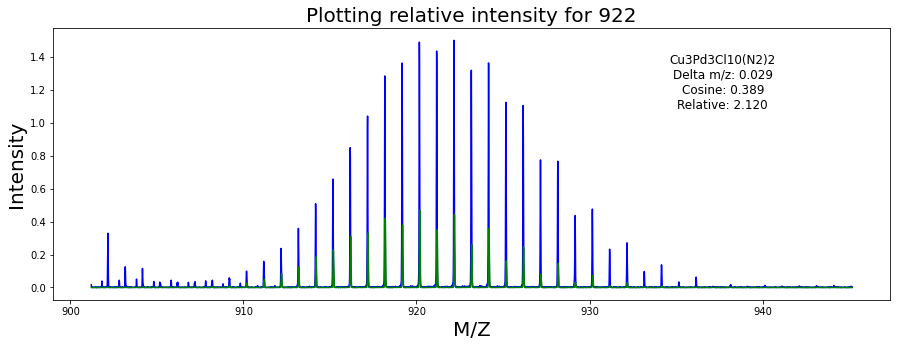

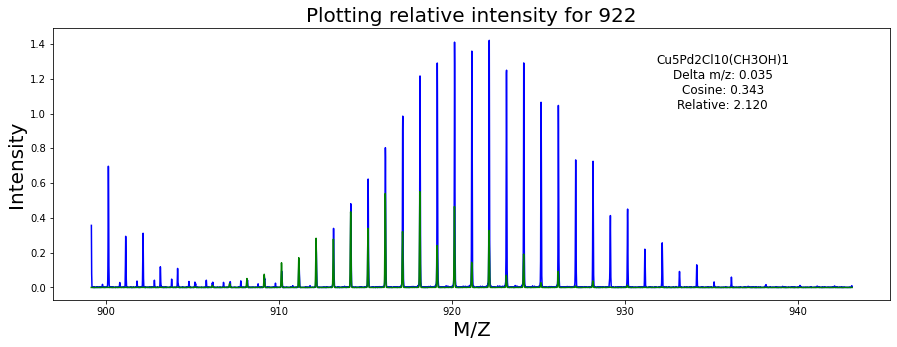

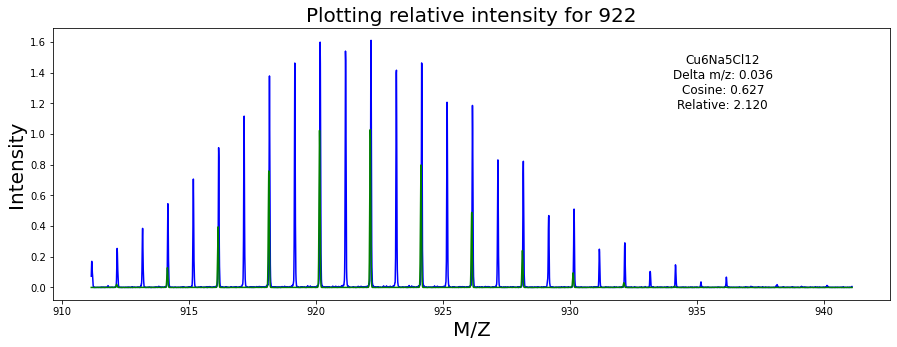

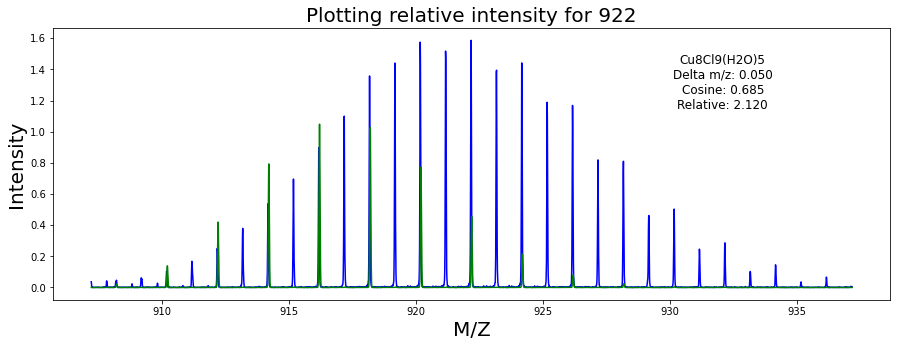

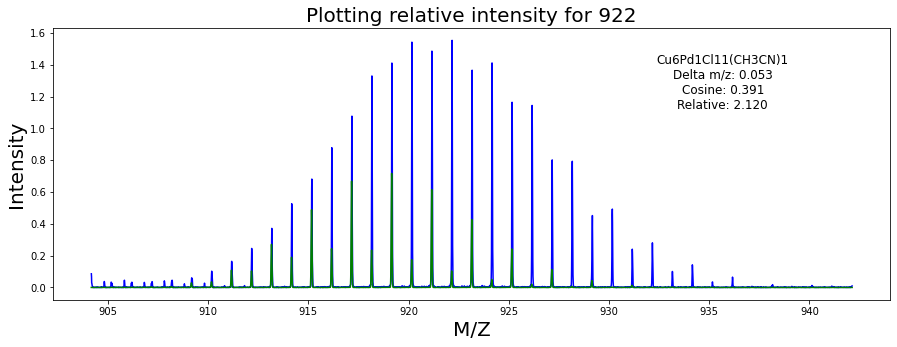

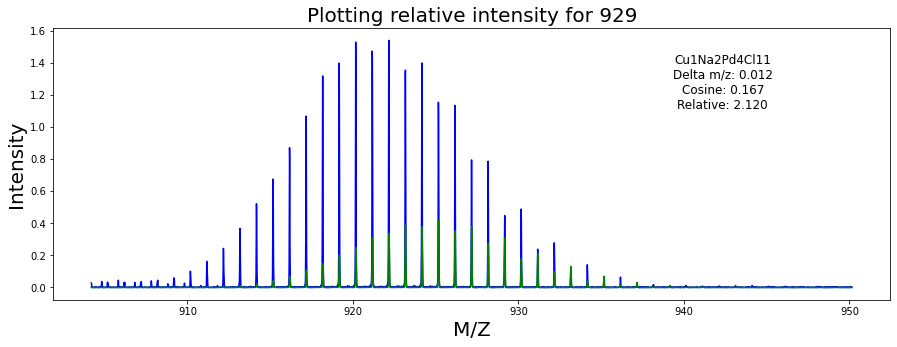

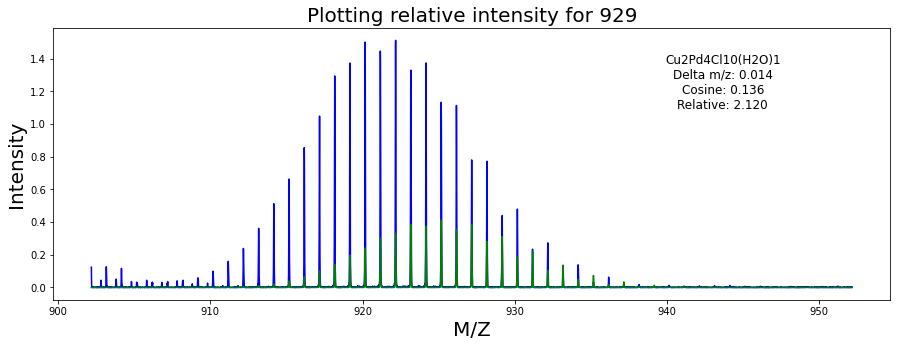

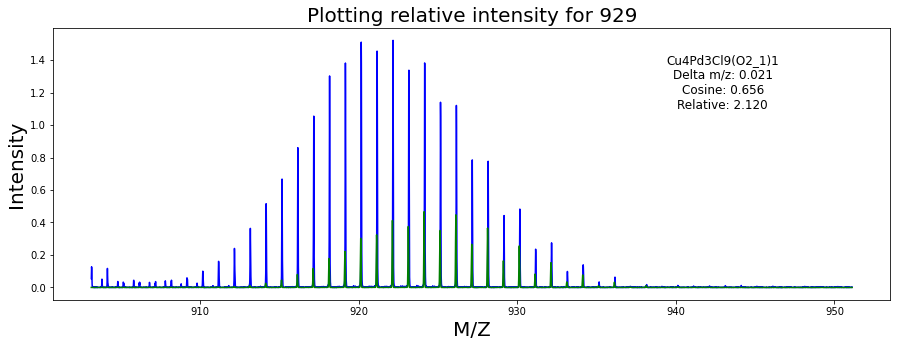

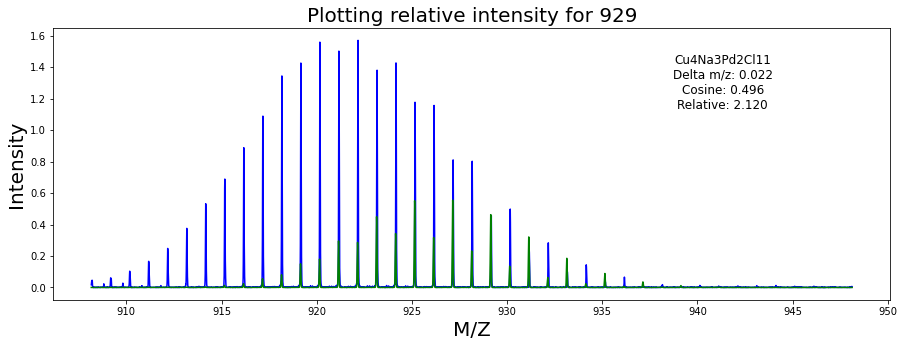

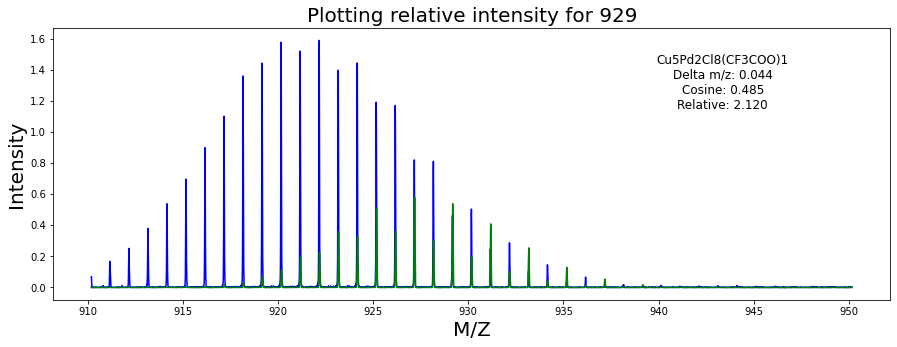

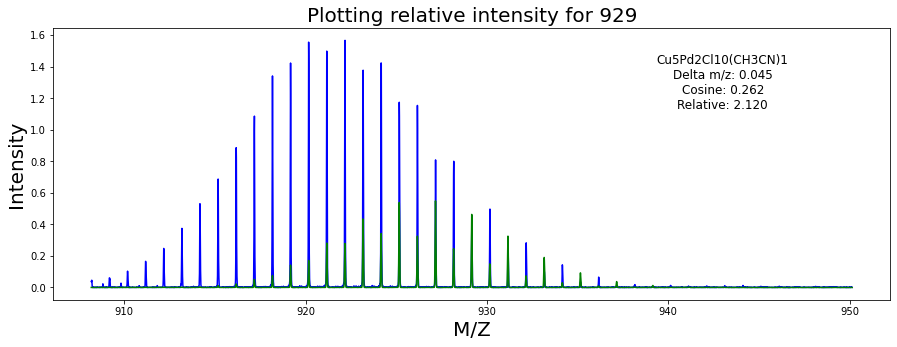

Error in callback <function flush_figures at 0x0000020B0B22EE58> (for post_execute):


KeyboardInterrupt: 

In [25]:
# Plotting results for individual recognised spectr
for mass, data in ranked.items():
    print(f"Mass {mass} has found {len(data)}")
    for match in data:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))

        ax.plot(
            match["spectrum"][0], norm(match["spectrum"][1]) * 100, color="blue",
        )
        ax.plot(match["mz"], norm(match["it"]) * 100, color="green")
        ax.set_xlabel("M/Z", fontsize=20)
        ax.set_ylabel("Intensity", fontsize=20)

        test_label = [
            f"{formal_formula(match['composition'])}",
            f"Delta m/z: {match['delta']:.3f}",
            f"Cosine: {match['metrics']['cosine']:.3f}",
            f"Relative: {match['relative']:.3f}",
        ]

        ax.text(
            0.8,
            0.8,
            "\n".join(test_label),
            color="black",
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=12,
            transform=ax.transAxes,
        )
        ax.set_title(f"Plotting relative intensity for {int(mass+0.5)}", fontsize=20)
        cluster_path = f"{path}/{int(mass+0.5)}"
        if not os.path.exists(cluster_path):
            os.makedirs(cluster_path)
        plt.savefig(f"{cluster_path}/{match['formula']}.png", dpi=300)

In [39]:
# Making CSV report for individual recognised spectr
report = {
    "mass": [],
    "brutto": [],
    "brutto_formal": [],
    "cosine": [],
    "relative": [],
}

for variable in initial_params.keys():
    report[variable[3:]] = []
for mass, data in ranked.items():

    for match in data:
        composition = match["composition"]
        report["mass"].append(round(mass))
        report["brutto"].append(match["formula"])
        report["brutto_formal"].append(formal_formula(composition))
        report["cosine"].append(match["metrics"]["cosine"])
        report["relative"].append(match["relative"])
        for variable in variables:
            if variable in composition:
                report[variable].append(composition[variable])
            else:
                report[variable].append(0)
    pd.DataFrame(report).to_csv(f"{path}/{file_name}.csv")

NameError: name 'variables' is not defined